
![logo](https://github.com/user-attachments/assets/cf81b6e0-f4b2-4403-9020-2e0199172c06)   

# Datathon: Projeto Passos Magicos


## Introdução da Atividade

O Datathon tem como objetivo criar propostas baseadas em dados para evidenciar o impacto da ONG Passos Mágicos na transformação social de crianças e jovens em situação de vulnerabilidade.

A ONG promove a educação como ferramenta de mudança, atendendo alunos do município de Embu-Guaçu. A competição oferece duas possibilidades de entrega:

### Proposta Analítica:

Criar um dashboard interativo e storytelling que demonstre os impactos da ONG.
Analisar o desempenho dos estudantes e criar indicadores úteis para a tomada de decisão.
Entregar insights sobre o perfil socioeconômico e educacional dos alunos.

### Proposta Preditiva:

Desenvolver um modelo preditivo para analisar o comportamento dos estudantes.
Utilizar técnicas como machine learning ou deep learning para propor soluções inovadoras.
Realizar o deploy do modelo preditivo em uma plataforma como Streamlit.
Os participantes podem optar por entregar apenas uma proposta ou ambas. A entrega deve conter o relatório e/ou modelo preditivo implementado com links no GitHub.



A Associação Passos Mágicos é uma organização sem fins lucrativos que atua desde 1992 com o objetivo de transformar a vida de crianças e jovens em situação de vulnerabilidade social no município de Embu-Guaçu. Fundada por Michelle Flues Ivanoff, Dimitri Ivanoff e colaboradores, a ONG surgiu do desejo de oferecer oportunidades educativas e culturais que promovam autonomia e impacto positivo na comunidade. O projeto cresceu de ações voluntárias em orfanatos para uma associação formal em 2016, permitindo a ampliação de suas atividades.

### **Missão, Visão e Princípios**

* Missão: Transformar vidas por meio da educação, oferecendo ferramentas para criar oportunidades de um futuro digno.
* Visão: Construir um Brasil em que todas as crianças e jovens tenham as mesmas condições para realizar seus sonhos e se tornem agentes transformadores.
* Princípios: Amor ao próximo, empatia, gratidão, pertencimento, busca pelo saber, e educação que transforma.

### **Metodologia e Etapas**

A metodologia da Passos Mágicos é baseada em quatro pilares principais:

1. Educação de Qualidade: Aulas de português, matemática, inglês e alfabetização, com turmas organizadas de acordo com o nível de conhecimento, e não por idade. Isso é complementado por aulas interativas e dinâmicas que incentivam o aprendizado e a curiosidade.
2. Assistência Psicológica: Oferece suporte emocional para alunos e familiares, com acompanhamento individual e em grupo, além de oficinas para melhorar relacionamentos interpessoais.
3. Ampliação da Visão de Mundo: Realização de atividades extracurriculares como visitas a museus, parques e eventos culturais, que expandem o horizonte das crianças.
4. Protagonismo: Alunos são incentivados a desenvolver autonomia e liderar iniciativas dentro da ONG, incluindo a possibilidade de bolsas em escolas particulares e universidades para aqueles com bom desempenho.

### **A ONG implementa programas inovadores como:**

* Programa de Aceleração do Conhecimento (PAC): Uma jornada educacional com 7 fases e foco no desenvolvimento integral, oferecendo aulas complementares, suporte psicológico e bolsas de estudos.
* Parcerias Estratégicas: Colaborações com instituições como USP (Programa Paidéia), SENAI, FIAP e empresas privadas como Itaú, Santander, e Estácio de Sá. Essas parcerias possibilitam bolsas, treinamentos e acesso a tecnologias para potencializar o impacto educacional.

# Conhecendo os dados

### 1. Importando Bibliotecas:

In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 2. Carregando e Explorando os Dados:

In [322]:
df = pd.read_csv('https://raw.githubusercontent.com/Tamireees/Datathon-Projeto-Passos-Magicos/refs/heads/main/dados/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

* *Identificamos que seria benéfico dividir os dados por ano, pois essa abordagem nos permitiria obter uma visualização mais clara e detalhada das informações, além de facilitar uma análise mais precisa ao observar as variações e tendências ao longo de diferentes períodos.*

### Criação de funções:
(para dividir os dataframes, realizar a limpeza dos dados, gerar o mapa de correlação e criar o gráfico de contagem)

In [323]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]


In [324]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [325]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

In [326]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

## 2020

### **Conhecendo os dados:**

In [327]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020 = cleaning_dataset(df_2020)
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


In [328]:
df_2020_clean = df_2020


In [329]:
df_2020_clean = df_2020_clean[df_2020_clean['PEDRA_2020'] != 'D9891/2A']

### **Limpeza dos dados:**

In [330]:
# Alterando a quantidade de anos que estao no Passos Magicos, para o ano correspondente. E alterando o nome da coluna:
ano_map_2020 = {
2020: '0',
2019: '1',
2018: '2',
2017: '3',
2016: '4',
None: 'D971'
}

reverse_ano_map_2020 = {v: k for k, v in ano_map_2020.items()}
df_2020_clean['ANOS_PM_2020'] = (df_2020_clean['ANOS_PM_2020'].map(reverse_ano_map_2020))

df_2020_clean.rename(columns={'ANOS_PM_2020': 'ANO_INGRESSO_2020'}, inplace=True)

df_2020_clean['ANO_INGRESSO_2020'] = pd.to_datetime(df_2020_clean['ANO_INGRESSO_2020'], format='%Y')
# Extraindo apenas o ano
df_2020_clean['ANO_INGRESSO_2020'] = df_2020_clean['ANO_INGRESSO_2020'].dt.year

In [331]:
# Separando a parte numérica e a parte alfabética
df_2020_clean['FASE_2020'] = df_2020_clean['FASE_TURMA_2020'].str.extract('(\d+)')  # Captura os números
df_2020_clean['TURMA_2020'] = df_2020_clean['FASE_TURMA_2020'].str.extract('([A-Za-z]+)')  # Captura as letras



In [332]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2020_clean['PONTO_VIRADA_2020'] = df_2020_clean['PONTO_VIRADA_2020'].apply(lambda x: 1 if x == 'Sim' else 0)

In [333]:
df_2020_clean['INDE_2020'] = pd.to_numeric(df_2020_clean['INDE_2020'], errors='coerce')

In [334]:
df_2020_clean['PEDRA_2020'] = pd.Categorical(df_2020_clean['PEDRA_2020'])

In [335]:
# Não tem definição essa coluna.
df_2020_clean['INDE_CONCEITO_2020'].unique()

array(['B', 'D', 'A', 'C'], dtype=object)

In [336]:
df_2020_clean['DESTAQUE_IPV_2020'] = df_2020_clean['DESTAQUE_IPV_2020'].apply(lambda x: 1 if isinstance(x, str) and 'Seu destaque em 2020:' in x else 0)
df_2020_clean['DESTAQUE_IDA_2020'] = df_2020_clean['DESTAQUE_IDA_2020'].apply(lambda x: 1 if 'Seu destaque' in x else 0)
df_2020_clean['DESTAQUE_IEG_2020'] = df_2020_clean['DESTAQUE_IEG_2020'].apply(lambda x: 1 if 'Seu destaque' in x else 0)


In [337]:
df_2020_clean[['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']] = df_2020_clean[['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']].apply(pd.to_numeric, errors='coerce')

In [338]:
df_2020_clean = df_2020_clean.drop(columns=['TURMA_2020', 'FASE_TURMA_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020', 'INDE_CONCEITO_2020'])

## 2021

### **Conhecendo os dados:**

In [339]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,...,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,...,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,...,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,...,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,...,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,...,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


### **Limpeza dos dados:**

In [340]:
df_2021_clean = df_2021


In [341]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].value_counts()

SINALIZADOR_INGRESSANTE_2021
Veterano       437
Ingressante    249
Name: count, dtype: int64

In [342]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].isnull().sum()

np.int64(0)

In [343]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'] = df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].apply(lambda x: 2021 if isinstance(x, str) and 'Ingressante' in x else 'Veterano')
df_ano_veterano = df_2021_clean[df_2021_clean['SINALIZADOR_INGRESSANTE_2021'] != 2021][['NOME', 'SINALIZADOR_INGRESSANTE_2021']]

df_2020_ano_regresso = df_2020_clean[['NOME', 'ANO_INGRESSO_2020']]

In [344]:
merged_df = df_ano_veterano.merge(df_2020_ano_regresso[['NOME', 'ANO_INGRESSO_2020']], on='NOME', how='left')
df_2021_clean = df_2021_clean.merge(merged_df[['NOME', 'ANO_INGRESSO_2020']], on='NOME', how='left')

In [345]:
df_2021_ano = df_2021_clean[['SINALIZADOR_INGRESSANTE_2021', 'ANO_INGRESSO_2020']]
df_2021_ano.loc[(df_2021_ano['SINALIZADOR_INGRESSANTE_2021'] == 2021) & (df_2021_ano['ANO_INGRESSO_2020'].isna()),'ANO_INGRESSO_2020'] = 2021


In [346]:
df_2021_clean['ANO_INGRESSO_2020'].update(df_2021_ano['ANO_INGRESSO_2020'])

In [347]:
df_2021_clean = df_2021_clean[~df_2021_clean['NOME'].isin(['ALUNO-71', 'ALUNO-506'])]


In [348]:
df_2021_clean = df_2021_clean.drop(columns=['TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021', 'SINALIZADOR_INGRESSANTE_2021'])


In [349]:
df_2021_clean = df_2021_clean.rename(columns={'ANO_INGRESSO_2020': 'ANO_INGRESSO_2021'})

In [350]:
df_2021_clean['ANO_INGRESSO_2021'] = pd.to_datetime(df_2021_clean['ANO_INGRESSO_2021'], format='%Y')
# Extraindo apenas o ano
df_2021_clean['ANO_INGRESSO_2021'] = df_2021_clean['ANO_INGRESSO_2021'].dt.year

In [351]:
# Analisar, temos 12 alunos sem data de entrada:
df_2021_clean[df_2021_clean['ANO_INGRESSO_2021'].isnull()]

,NOME,FASE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,ANO_INGRESSO_2021
90,ALUNO-176,2.0,Ágata,5.674,7.5,6.3,5.0,4.3,6.7,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,5.7,5.0,Nível 3 (7o e 8o ano),-1.0,NaN
158,ALUNO-336,0.0,Ametista,7.533,9.0,10.0,6.3,6.9,7.5,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não avaliado,Não,6.9,5.0,Nível 1 (4o ano),-1.0,NaN
208,ALUNO-432,0.0,Quartzo,4.946,9.0,6.7,5.0,2.6,2.5,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não avaliado,Não,4.8,5.0,Nível 2 (5o e 6o ano),-2.0,NaN
346,ALUNO-706,2.0,Ametista,7.213,10.0,6.3,7.5,6.9,7.7,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não avaliado,Não,7.8,5.0,Nível 3 (7o e 8o ano),-1.0,NaN
387,ALUNO-781,3.0,Quartzo,5.450,8.8,3.1,7.5,3.3,6.7,Mantido na Fase atual,Alocado em Fase anterior,Mantido na Fase atual,Não avaliado,Não,4.4,10.0,Nível 3 (7o e 8o ano),0.0,NaN
453,ALUNO-897,3.0,Quartzo,5.135,7.9,3.3,6.9,4.3,6.7,Mantido na Fase atual,Alocado em Fase anterior,Mantido na Fase atual,Não avaliado,Não,4.8,5.0,Nível 4 (9o ano),-1.0,NaN
506,ALUNO-995,1.0,Ágata,5.751,8.0,5.8,7.5,0.9,7.7,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.9,5.0,Nível 2 (5o e 6o ano),-1.0,NaN
560,ALUNO-1096,3.0,Topázio,8.814,10.0,8.9,7.5,7.5,8.3,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase,Não avaliado,Sim,9.7,10.0,Nível 3 (7o e 8o ano),0.0,NaN
619,ALUNO-1201,7.0,Ametista,7.031,7.1,6.1,5.6,6.5,8.1,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Não,7.1,10.0,Nível 7 (3o EM),0.0,NaN
638,ALUNO-1233,5.0,Ametista,7.416,9.6,6.7,5.0,7.8,7.7,Mantido na Fase atual,Mantido na Fase + Bolsa,Promovido de Fase,Promovido de Fase,Não,6.5,10.0,Nível 5 (1o EM),0.0,NaN


In [352]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2021_clean['PONTO_VIRADA_2021'] = df_2021_clean['PONTO_VIRADA_2021'].apply(lambda x: 1 if x == 'Sim' else 0)

In [353]:
df_2021_clean['INDE_2021'] = pd.to_numeric(df_2021_clean['INDE_2021'], errors='coerce')


In [354]:
df_2021_clean['NIVEL_IDEAL_2021'] = pd.Categorical(df_2021_clean['NIVEL_IDEAL_2021'])
df_2021_clean['PEDRA_2021'] = pd.Categorical(df_2021_clean['PEDRA_2021'])

In [355]:

# Dado que as colunas de recomendações (['REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021']) contêm algumas recomendações repetidas e valores nan, 
# podemos unificá-las em uma nova coluna de forma mais eficiente.
# Unificar considerando a recomendação mais frequente
df_2021_clean['REC_AVA_UNIFICADO'] = df_2021_clean[['REC_EQUIPE_1_2021', 'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021']].apply(lambda row: row.mode()[0] if not row.mode().empty else None, axis=1)
df_2021_clean.drop(columns=['REC_EQUIPE_1_2021','REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021'], inplace=True)

In [356]:
# Corrigindo a sintaxe do dicionário e aplicando ao campo NIVEL_IDEAL_2022
fase_map_2021 = {
    0: 'ALFA  (2o e 3o ano)',
    1: 'Nível 1 (4o ano)',
    2: 'Nível 2 (5o e 6o ano)',
    3: 'Nível 3 (7o e 8o ano)',
    4: 'Nível 4 (9o ano)',
    5: 'Nível 5 (1o EM)',
    6: 'Nível 6 (2o EM)',
    7: 'Nível 7 (3o EM)',
    8: 'Nível 8 (Universitários)',
    9: 'ERRO'
}

# Mapeando o valor de NIVEL_IDEAL_2022 para a numeração
# Criando um dicionário reverso para fazer a conversão dos textos para os números
reverse_fase_map_2021 = {v: k for k, v in fase_map_2021.items()}

# Substituindo o texto em NIVEL_IDEAL_2022 pela numeração correspondente
df_2021_clean['NIVEL_IDEAL_2021'] = df_2021_clean['NIVEL_IDEAL_2021'].map(reverse_fase_map_2021)


## 2022

### **Conhecendo os dados:**

In [357]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


### **Tratamento e Limpeza dos dados:**

In [358]:
df_2022_clean = df_2022.drop(columns=['TURMA_2022', 'CG_2022', 'CF_2022', 'CT_2022'])


In [359]:
df_2022_clean['ANO_INGRESSO_2022'] = pd.to_datetime(df_2022_clean['ANO_INGRESSO_2022'], format='%Y')
# Extraindo apenas o ano
df_2022_clean['ANO_INGRESSO_2022'] = df_2022_clean['ANO_INGRESSO_2022'].dt.year

In [360]:
# Transformar as colunas de categorias em valores binários (0 e 1)
df_2022_clean['BOLSISTA_2022'] = df_2022_clean['BOLSISTA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)
df_2022_clean['DESTAQUE_IEG_2022'] = df_2022_clean['DESTAQUE_IEG_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['DESTAQUE_IDA_2022'] = df_2022_clean['DESTAQUE_IDA_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['DESTAQUE_IPV_2022'] = df_2022_clean['DESTAQUE_IPV_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['INDICADO_BOLSA_2022'] = df_2022_clean['INDICADO_BOLSA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)
df_2022_clean['PONTO_VIRADA_2022'] = df_2022_clean['PONTO_VIRADA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)

In [361]:
df_2022_clean[['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022']].isnull().sum()
df_2022_clean = df_2022_clean.drop(columns=['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022'])

In [362]:
df_2022_clean['NIVEL_IDEAL_2022'] = pd.Categorical(df_2022_clean['NIVEL_IDEAL_2022'])
df_2022_clean['PEDRA_2022'] = pd.Categorical(df_2022_clean['PEDRA_2022'])

In [363]:
# Dado que as colunas de recomendações (REC_AVA_1_2022, REC_AVA_2_2022, REC_AVA_3_2022, REC_AVA_4_2022) contêm algumas recomendações repetidas e valores nan, 
# podemos unificá-las em uma nova coluna de forma mais eficiente.
# Unificar considerando a recomendação mais frequente
df_2022_clean['REC_AVA_UNIFICADO'] = df_2022_clean[['REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022']].apply(lambda row: row.mode()[0] if not row.mode().empty else None, axis=1)
df_2022_clean.drop(columns=['REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022'], inplace=True)


In [364]:
# Corrigindo a sintaxe do dicionário e aplicando ao campo NIVEL_IDEAL_2022
fase_map = {
    0: 'ALFA  (2º e 3º ano)',
    1: 'Fase 1 (4º ano)',
    2: 'Fase 2 (5º e 6º ano)',
    3: 'Fase 3 (7º e 8º ano)',
    4: 'Fase 4 (9º ano)',
    5: 'Fase 5 (1º EM)',
    6: 'Fase 6 (2º EM)',
    7: 'Fase 7 (3º EM)',
    8: 'Fase 8 (Universitários)'
}

# Mapeando o valor de NIVEL_IDEAL_2022 para a numeração
# Criando um dicionário reverso para fazer a conversão dos textos para os números
reverse_fase_map = {v: k for k, v in fase_map.items()}

# Substituindo o texto em NIVEL_IDEAL_2022 pela numeração correspondente
df_2022_clean['NIVEL_IDEAL_2022'] = df_2022_clean['NIVEL_IDEAL_2022'].map(reverse_fase_map)

# DADOS 'PASSOS MÁGICOS'

## **Conhecendo os dados:**

**Dados Dataset correspondente aos anos de 2020, 2021 e 2022:**
* 'NOME': 'Nome do aluno (dados anonimizados)'

* 'FASE': 'Fase e o Nível de Aprendizado do Aluno no ano correspondente'

* 'PEDRA': 'Classificação do Aluno baseado no número do INDE no ano correspondente'

* 'PONTO_VIRADA': 'Campo do tipo booleano que sinaliza se o Aluno atingiu o “Ponto de Virada” no ano correspondente'

* 'ANO_INGRESSO': 'Ano que o Aluno ingressou na Passos Mágicos (atualizado no ano correspondente)

* 'IAN': 'Indicador de Adequação ao Nível – Média das notas de adequação do Aluno ao nível atual no ano correspondente

* 'IDA': 'Indicador de Aprendizagem - Média das notas do Indicador de Aprendizagem no ano correspondente'

* 'IEG': 'Indicador de Engajamento – Média das notas de Engajamento do Aluno no ano correspondente'

* 'IAA': 'Indicador de Autoavaliação – Média das notas de Autoavaliação do Aluno no ano correspondente'

* 'IPS': 'Indicador Psicossocial – Média das notas psicossociais do Aluno no ano correspondente'

* 'IPP': 'Indicador Psicopedagógico – Média das notas psicopedagógicas do Aluno no ano correspondente'

* 'IPV': 'Indicador de Ponto de Virada – Média das notas de Ponto de Virada do Aluno no ano correspondente'

* 'INDE': 'Índice do Desenvolvimento Educacional – Métrica de processo avaliativo geral do Aluno no ano correspondente',

In [365]:
df_merged = df_2020_clean.merge(df_2021_clean, on='NOME', how='outer')
df_clean = df_merged.merge(df_2022_clean, on='NOME', how='outer')

In [366]:
df_clean = df_clean[[
    'NOME','FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 
    'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022','ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022',  
    'IAN_2020', 'IAN_2021','IAN_2022', 'IDA_2020','IDA_2021','IDA_2022', 
    'IEG_2020','IEG_2021', 'IEG_2022', 'IAA_2020','IAA_2021', 'IAA_2022',
    'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020','IPP_2021', 'IPP_2022', 
    'IPV_2020','IPV_2021','IPV_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022']]

In [367]:
df_clean.shape

(1348, 37)

In [368]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOME               1348 non-null   object  
 1   FASE_2020          727 non-null    object  
 2   FASE_2021          684 non-null    float64 
 3   FASE_2022          862 non-null    float64 
 4   PEDRA_2020         727 non-null    category
 5   PEDRA_2021         684 non-null    category
 6   PEDRA_2022         862 non-null    category
 7   PONTO_VIRADA_2020  727 non-null    float64 
 8   PONTO_VIRADA_2021  684 non-null    float64 
 9   PONTO_VIRADA_2022  862 non-null    float64 
 10  ANO_INGRESSO_2020  727 non-null    float64 
 11  ANO_INGRESSO_2021  672 non-null    float64 
 12  ANO_INGRESSO_2022  862 non-null    float64 
 13  IAN_2020           727 non-null    float64 
 14  IAN_2021           684 non-null    float64 
 15  IAN_2022           862 non-null    float64 
 16  IDA_20

In [369]:
df_clean['NOME'].duplicated().sum()

np.int64(0)

In [370]:
df_clean.isnull().sum()
# Acredito que quando os valores estão vazios, são alunos que podem ter desistido de participar do projeto.

NOME                   0
FASE_2020            621
FASE_2021            664
FASE_2022            486
PEDRA_2020           621
PEDRA_2021           664
PEDRA_2022           486
PONTO_VIRADA_2020    621
PONTO_VIRADA_2021    664
PONTO_VIRADA_2022    486
ANO_INGRESSO_2020    621
ANO_INGRESSO_2021    676
ANO_INGRESSO_2022    486
IAN_2020             621
IAN_2021             664
IAN_2022             486
IDA_2020             621
IDA_2021             664
IDA_2022             486
IEG_2020             621
IEG_2021             664
IEG_2022             486
IAA_2020             621
IAA_2021             664
IAA_2022             486
IPS_2020             621
IPS_2021             664
IPS_2022             486
IPP_2020             621
IPP_2021             664
IPP_2022             486
IPV_2020             621
IPV_2021             664
IPV_2022             486
INDE_2020            621
INDE_2021            664
INDE_2022            486
dtype: int64

## **Limpeza dos dados:**

In [371]:
def classificar_status(row):
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.notnull(row['ANO_INGRESSO_2021']) and pd.notnull(row['ANO_INGRESSO_2022']):
        return 'Ativo'
    
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.notnull(row['ANO_INGRESSO_2021']) and pd.isnull(row['ANO_INGRESSO_2022']):
        return 'Desistiu em 2022'    
    
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.isnull(row['ANO_INGRESSO_2021']) and pd.isnull(row['ANO_INGRESSO_2022']):
        return 'Desistiu em 2021'
        
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.isnull(row['ANO_INGRESSO_2021']) and pd.notnull(row['ANO_INGRESSO_2022']):
        return 'Retornou em 2022'
    
    return 'Desistencia'
df_clean_completo= df_clean #alterei para completo pois vai constar todas as variaveis do ano_ingresso_ANO
df_clean_completo['STATUS_ALUNO'] = df_clean.apply(classificar_status, axis=1)

In [372]:
df_clean['ANO_INGRESSO'] = df_clean_completo['ANO_INGRESSO_2020'].combine_first(df_clean_completo['ANO_INGRESSO_2021']).combine_first(df_clean_completo['ANO_INGRESSO_2022'])

df_clean_completo['STATUS_ALUNO'].unique(), df_clean_completo['ANO_INGRESSO'].unique()

(array(['Desistiu em 2022', 'Desistiu em 2021', 'Ativo', 'Desistencia',
        'Retornou em 2022'], dtype=object),
 array([2018., 2019., 2022., 2021., 2020., 2017., 2016.,   nan]))

In [373]:
df_clean.drop(columns=['ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022'], inplace=True)

In [374]:
df_clean['STATUS_ALUNO'].unique()

array(['Desistiu em 2022', 'Desistiu em 2021', 'Ativo', 'Desistencia',
       'Retornou em 2022'], dtype=object)

In [375]:
df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']] = df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']].applymap(lambda x: int(x) if pd.notna(x) else x)

In [376]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOME               1348 non-null   object  
 1   FASE_2020          727 non-null    float64 
 2   FASE_2021          684 non-null    float64 
 3   FASE_2022          862 non-null    float64 
 4   PEDRA_2020         727 non-null    category
 5   PEDRA_2021         684 non-null    category
 6   PEDRA_2022         862 non-null    category
 7   PONTO_VIRADA_2020  727 non-null    float64 
 8   PONTO_VIRADA_2021  684 non-null    float64 
 9   PONTO_VIRADA_2022  862 non-null    float64 
 10  IAN_2020           727 non-null    float64 
 11  IAN_2021           684 non-null    float64 
 12  IAN_2022           862 non-null    float64 
 13  IDA_2020           727 non-null    float64 
 14  IDA_2021           684 non-null    float64 
 15  IDA_2022           862 non-null    float64 
 16  IEG_20

## **Explorando os dados:**

### *Explorando as variáveis qualitativas*

In [377]:
qualitative_columns_total = [
    'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 
    'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022', 'STATUS_ALUNO']

* **Análise de Frequência**

In [378]:
categories = {
    'FASE': ['FASE_2020', 'FASE_2021', 'FASE_2022'],
    'PEDRA': ['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
    'PONTO_VIRADA': ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022'],
    'STATUS_ALUNO': ['STATUS_ALUNO']
}

In [379]:
for category, cols in categories.items():
    print(f"\nDistribuição de Frequências para {category}:")
    frequencies = df_clean[cols].apply(
        lambda col: col.value_counts(normalize=True), axis=0
    )
    display(frequencies.style.format("{:.2%}"))


Distribuição de Frequências para FASE:


,FASE_2020,FASE_2021,FASE_2022
0.000000,11.28%,17.54%,22.04%
1.000000,23.66%,19.88%,22.27%
2.000000,21.32%,23.68%,17.98%
3.000000,16.78%,16.81%,17.17%
4.000000,7.57%,8.63%,8.82%
5.000000,7.43%,7.31%,6.96%
6.000000,4.13%,3.36%,2.09%
7.000000,4.54%,2.78%,2.67%
8.000000,3.30%,nan%,nan%



Distribuição de Frequências para PEDRA:


,PEDRA_2020,PEDRA_2021,PEDRA_2022
Ametista,46.22%,43.13%,40.37%
Ágata,23.52%,26.02%,29.00%
Quartzo,17.61%,16.08%,15.55%
Topázio,12.65%,14.77%,15.08%



Distribuição de Frequências para PONTO_VIRADA:


,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0.000000,87.07%,84.21%,86.89%
1.000000,12.93%,15.79%,13.11%



Distribuição de Frequências para STATUS_ALUNO:


,STATUS_ALUNO
STATUS_ALUNO,
Desistencia,46.07%
Ativo,23.29%
Desistiu em 2021,19.21%
Desistiu em 2022,10.46%
Retornou em 2022,0.96%


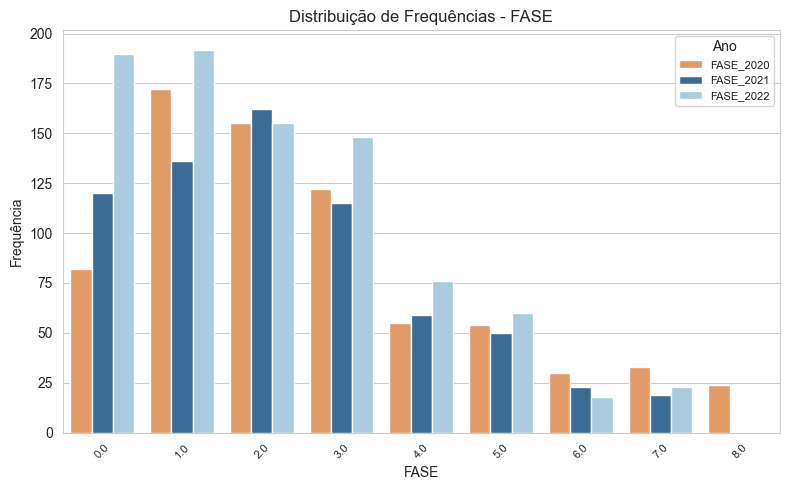

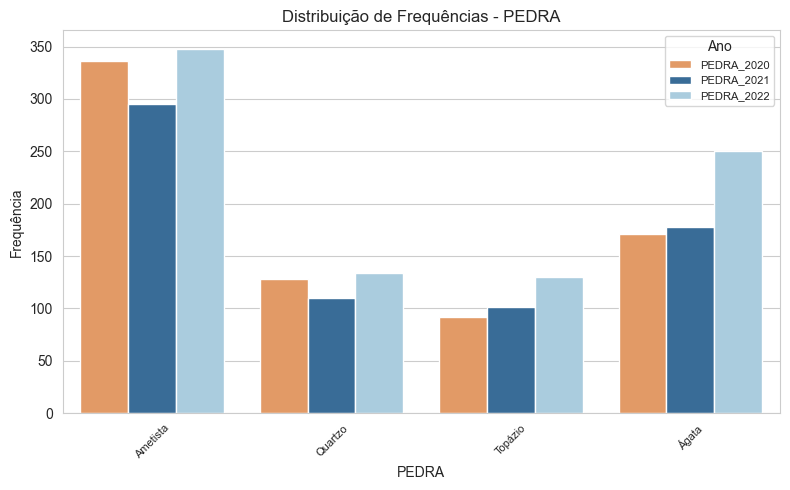

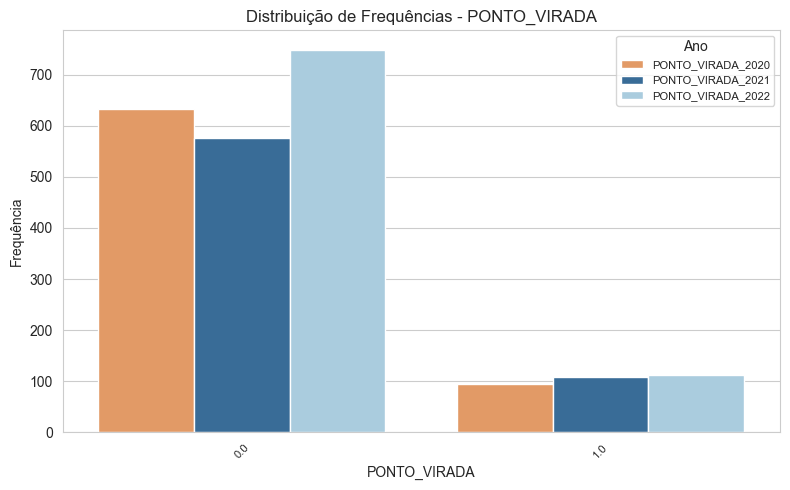

In [380]:
categories = {
    'FASE': ['FASE_2020', 'FASE_2021', 'FASE_2022'],
    'PEDRA': ['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
    'PONTO_VIRADA': ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']#,
    #'STATUS_ALUNO': ['STATUS_ALUNO']
}

custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6'] 

for category, col_group in categories.items():
    if all(col in df_clean.columns for col in col_group):
        melted_data = pd.melt(
                        df_clean[col_group], 
                            var_name='Ano', 
                            value_name=category  
                        )

        plt.figure(figsize=(8, 5))
        sns.countplot(
            data=melted_data, 
            x=category,  
            hue='Ano', 
            palette=custom_palette
        )
        plt.title(f"Distribuição de Frequências - {category}", fontsize=12)
        plt.xlabel(category, fontsize=10) 
        plt.ylabel("Frequência", fontsize=10)
        plt.xticks(rotation=45, fontsize=8)
        plt.legend(title="Ano", fontsize=8)
        plt.tight_layout()
        plt.show()



1. Distribuição de Frequências para FASE

* Aumento na fase inicial (0): A porcentagem de indivíduos na fase inicial cresceu de 11.28% em 2020 para 22.04% em 2022, indicando um influxo significativo de novos participantes nos últimos anos.
* Redistribuição em fases intermediárias: As fases intermediárias (1 a 5) mostram estabilidade relativa, com variações moderadas. No entanto, a fase 2 diminuiu de 23.68% em 2021 para 17.98% em 2022, sugerindo uma possível dificuldade em avançar a partir dessa etapa.
* Redução em fases avançadas (6 e superiores): Observa-se uma tendência decrescente nas fases finais. A fase 8 praticamente desaparece em 2021 e 2022, o que pode indicar que  estes alunos ingressaram nos cursos superiores.

A alta concentração inicial em 2022 e a redução nas fases avançadas apontam para uma necessidade de estratégias para aumentar a progressão e retenção em níveis mais elevados.

2. Distribuição de Frequências para PEDRA

* Predominância de "Ametista": Essa categoria mantém a liderança ao longo dos anos, embora tenha reduzido sua proporção de 46.22% em 2020 para 40.37% em 2022.
* Crescimento de "Ágata": A participação dessa categoria aumentou significativamente de 23.52% em 2020 para 29.00% em 2022, indicando uma mudança de preferência ou uma transição demográfica no grupo.
* Estabilidade em "Quartzo" e "Topázio": As categorias mantêm percentuais relativamente constantes, com leves ajustes anuais.

3. Distribuição de Frequências para PONTO_VIRADA

* Predominância do valor 0 (não atingiram o ponto de virada): A maior parte dos indivíduos não conseguiu avançar para os próximos passos, com a porcentagem de participantes que não atingiram o ponto de virada variando de 87.07% em 2020 para 86.89% em 2022.

* Leve aumento do valor 1 (atingiram o ponto de virada) em 2021: A porcentagem de indivíduos que conseguiram avançar para os próximos passos aumentou ligeiramente em 2021, alcançando 15.79%. Esse aumento pode ser reflexo de mudanças no ambiente ou na dinâmica dos participantes, como impactos externos, incluindo a pandemia de COVID-19.

Embora a maioria dos indivíduos não tenha avançado para os próximos passos, o aumento observado em 2021 sugere que é importante monitorar fatores externos e suas influências no progresso dos alunos.

4. Distribuição de Frequências para STATUS_ALUNO
* Alta taxa de desistência: Quase metade dos alunos (46.07%) desiste do programa, sendo um indicador crítico para avaliação. Entre os que desistem, 19.21% o fazem em 2021 e 10.46% em 2022.
* Baixa taxa de retorno: Apenas 0.96% dos alunos retornam ao programa em 2022, indicando dificuldades de reintegração.

* Proporção de ativos: Apenas 23.29% permanecem ativos, reforçando a necessidade de intervenções para melhorar a retenção.

A alta taxa de desistência e o baixo retorno ao programa são sinais de alerta, sugerindo a necessidade de estratégias para engajamento, suporte e acompanhamento dos alunos.

* **Alunos que Desistiram**

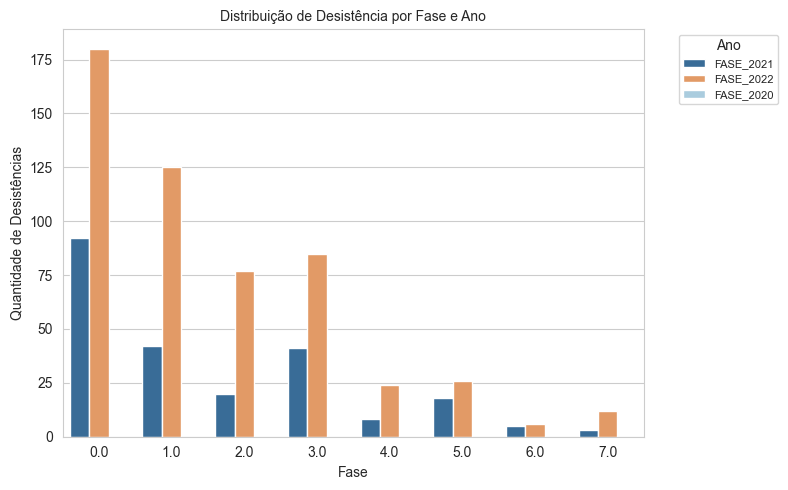

In [381]:
df_desistentes = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia']
df_desistentes['Ultima_Fase'] = df_desistentes[categories['FASE']].idxmax(axis=1).str.replace('FASE_', '').astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_desistentes.melt(id_vars=['STATUS_ALUNO'], value_vars=categories['FASE']),
    x='value', hue='variable', palette=['#2A6DA6', '#F79651', '#A2CFE6']
)
plt.title('Distribuição de Desistência por Fase e Ano', fontsize=10)
plt.ylabel('Quantidade de Desistências', fontsize=10)
plt.xlabel('Fase', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

1. Aumento progressivo das desistências ao longo dos anos: Há uma tendência clara de aumento nas desistências conforme o tempo passa, com picos significativos em 2022. Isso sugere que fatores externos, como a pandemia de COVID-19 ou outras mudanças no contexto educacional, podem ter influenciado negativamente o progresso dos alunos.

2. Fases mais críticas: As fases iniciais e intermediárias (Fase 0 a Fase 3) parecem ser os pontos de maior risco para desistência, com aumento considerável ao longo dos anos. Isso pode indicar a necessidade de intervenções mais eficazes nessas fases, oferecendo apoio extra aos alunos para que não desistam antes de avançarem.

3. Alunos mais avançados (Fase 4 a Fase 7): Apesar de uma quantidade menor de desistências nessas fases, ainda há uma preocupação, já que o aumento nas desistências de 2021 para 2022 pode ser reflexo de desafios acumulados ao longo do percurso acadêmico.


### *Explorando as variáveis quantitativas*

* **Análise Descritiva:**

In [382]:
quantitative_columns_total = [
    'ANO_INGRESSO',  
    'IAN_2020', 'IAN_2021','IAN_2022', 'IDA_2020','IDA_2021','IDA_2022', 
    'IEG_2020','IEG_2021', 'IEG_2022', 'IAA_2020','IAA_2021', 'IAA_2022',
    'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020','IPP_2021', 'IPP_2022', 
    'IPV_2020','IPV_2021','IPV_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022'
]

In [383]:
display(df_clean[quantitative_columns_total].describe().T)

,count,mean,std,min,25%,50%,75%,max
ANO_INGRESSO,1344.0,2019.939732,1.785212,2016.000000,2019.000000,2020.000000,2022.000000,2022.000000
IAN_2020,727.0,7.431224,2.556944,2.500000,5.000000,5.000000,10.000000,10.000000
IAN_2021,684.0,6.900585,2.484723,2.500000,5.000000,5.000000,10.000000,10.000000
IAN_2022,862.0,6.421114,2.387816,2.500000,5.000000,5.000000,10.000000,10.000000
IDA_2020,727.0,6.322260,2.960073,0.000000,4.666667,7.000000,8.666667,10.000000
IDA_2021,684.0,5.430556,2.142955,0.000000,4.100000,5.900000,6.925000,9.500000
IDA_2022,862.0,6.070688,2.059346,0.000000,4.750000,6.333333,7.583333,9.916667
IEG_2020,727.0,7.681155,2.382122,0.000000,6.600000,8.500000,9.500000,10.000000
IEG_2021,684.0,6.842544,2.434306,0.000000,5.300000,7.200000,8.800000,10.000000
IEG_2022,862.0,7.880728,1.649023,0.000000,6.999971,8.312179,9.102970,10.000000


* **Distribuição de Dados:**

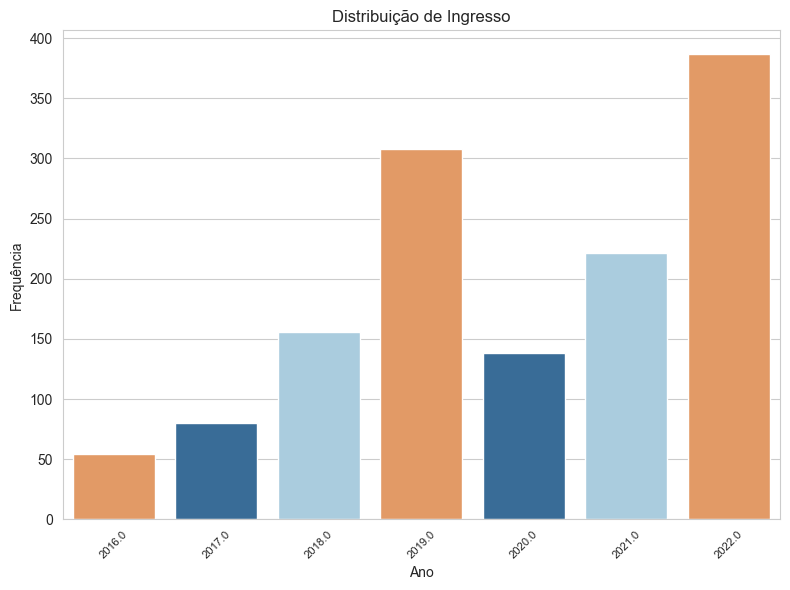

In [384]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='ANO_INGRESSO', palette=['#F79651', '#2A6DA6', '#A2CFE6'])
plt.title(f'Distribuição de Ingresso', fontsize=12)
plt.ylabel('Frequência', fontsize=10)
plt.xlabel('Ano', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

* Ano de Ingresso (ANO_INGRESSO):O ano médio de ingresso é 2019, o que é esperado, considerando que os dados são relativos a três anos consecutivos. O desvio padrão (1.78) indica que a variação dos anos de ingresso não é muito grande, a maioria dos alunos ingressou em 2019, com poucos ingressando em 2016 e 2022.

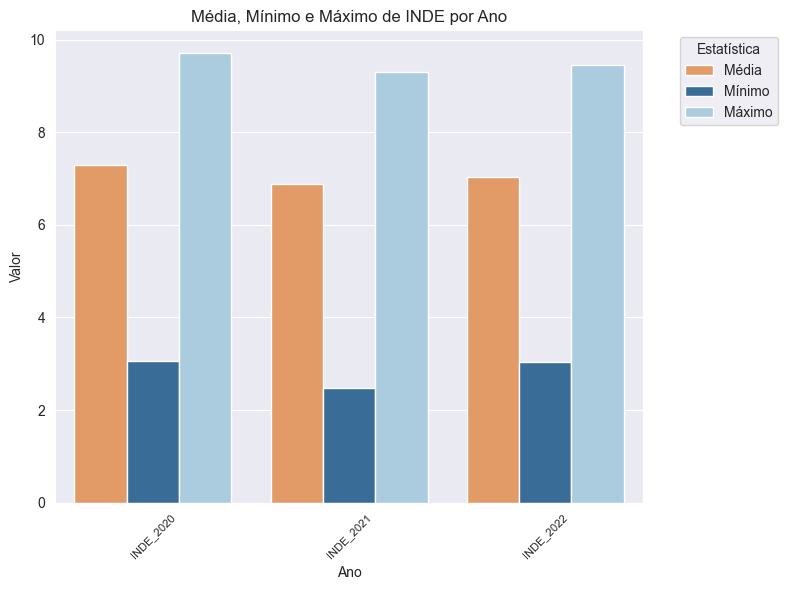

In [385]:
quantitative_ = {
    'INDE': ['INDE_2020', 'INDE_2021', 'INDE_2022']
}

for category, columns in quantitative_.items():
    plt.figure(figsize=(8, 6))
    sns.set_style('darkgrid')
    
    data = df_clean[columns].agg(['mean', 'min', 'max']).T.reset_index()
    data.columns = ['Ano', 'Média', 'Mínimo', 'Máximo']
    
    data_melted = pd.melt(data, id_vars=["Ano"], value_vars=["Média", "Mínimo", "Máximo"], 
                          var_name="Estatística", value_name="Valor")
    
    sns.barplot(data=data_melted, x='Ano', y='Valor', hue='Estatística', palette=['#F79651', '#2A6DA6', '#A2CFE6'])
    plt.title(f'Média, Mínimo e Máximo de {category} por Ano', fontsize=12)
    plt.ylabel('Valor', fontsize=10)
    plt.xlabel('Ano', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(title='Estatística', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



* O INDE_2020 apresenta a maior média (7.30), seguida de uma leve diminuição para 6.89 em 2021 e 7.03 em 2022.
* O desvio padrão menor ao longo dos anos sugere uma redução na variabilidade entre os alunos em relação à necessidade de desenvolvimento educacional, indicando que o apoio oferecido foi mais homogêneo ao longo do tempo.

* **Detecção de Outliers**

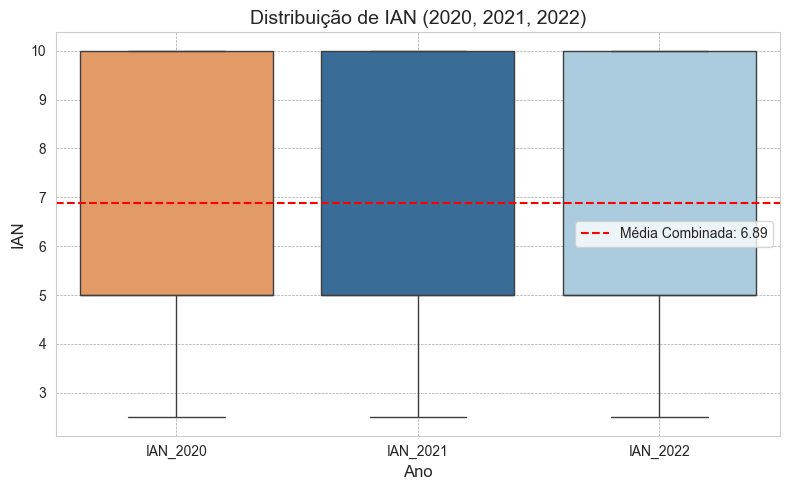

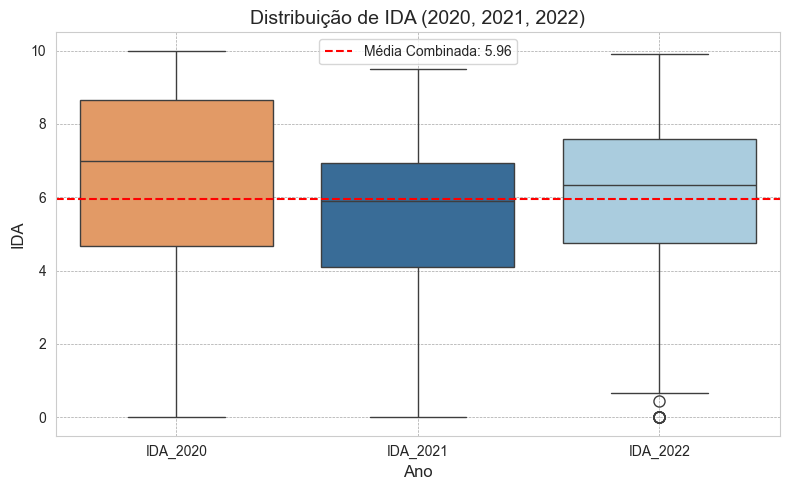

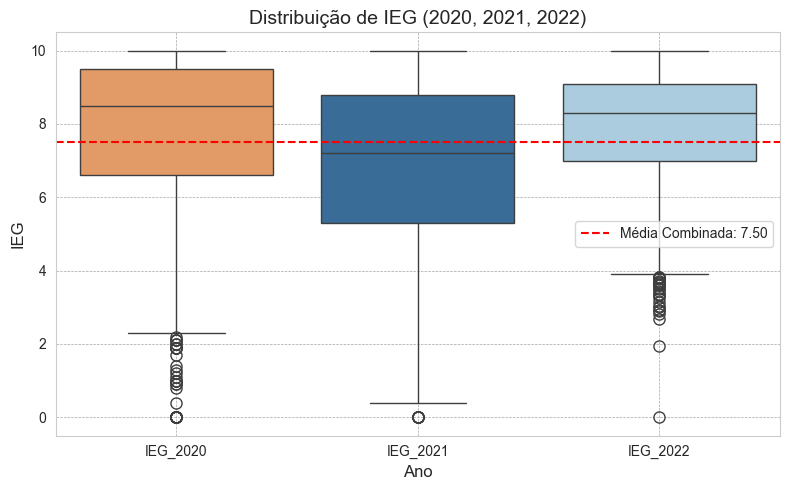

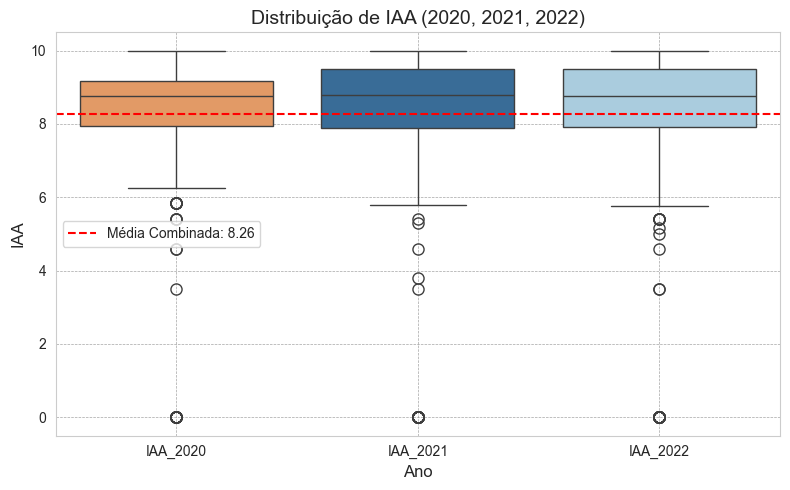

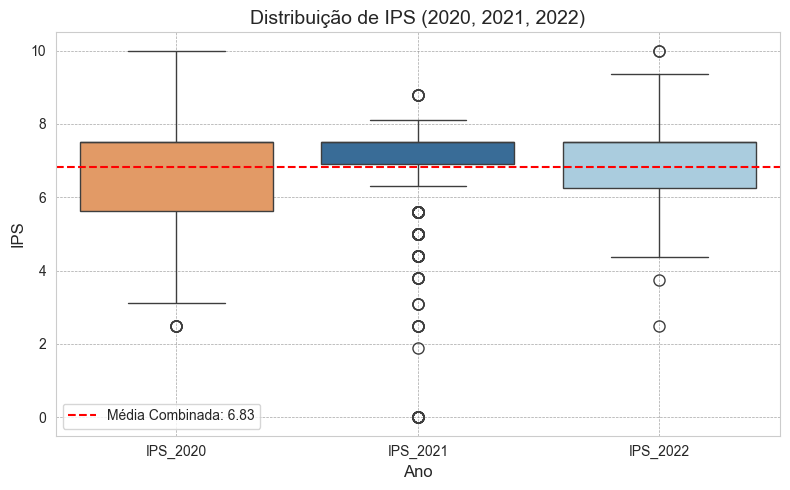

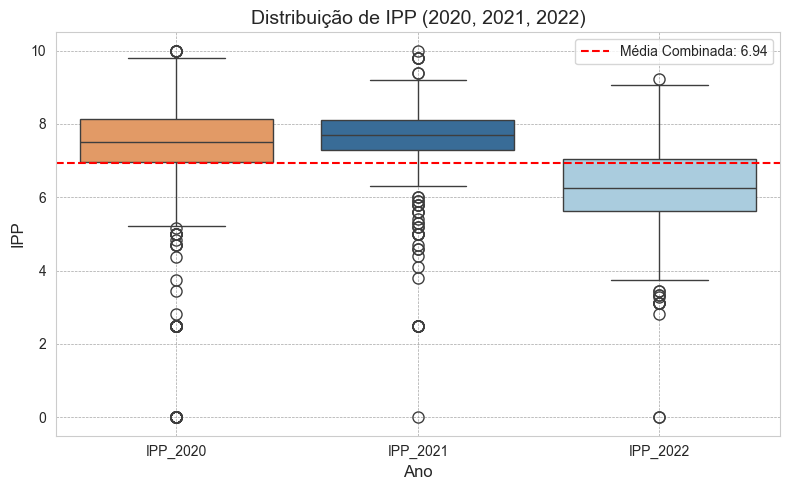

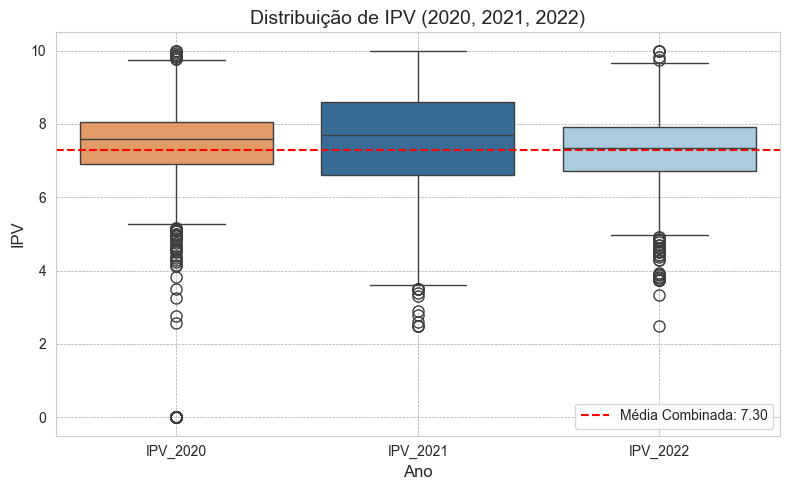

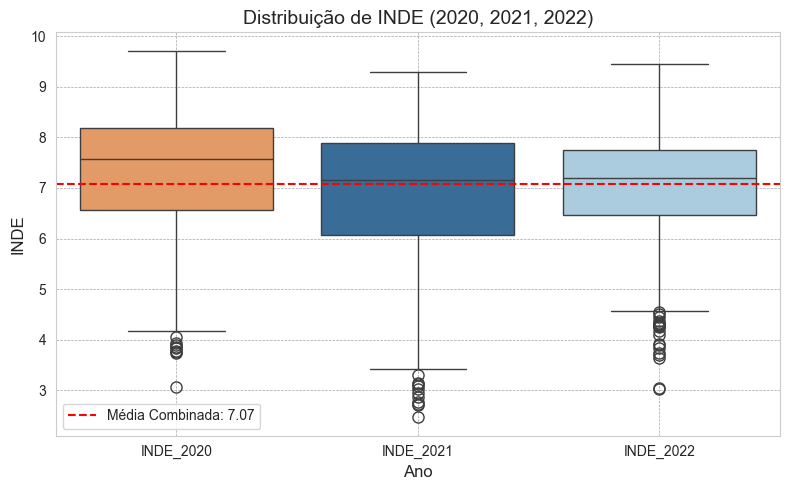

In [386]:
for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]]  
    df_plot = df_clean[cols].melt(var_name='Ano', value_name='Valor')
    
    plt.figure(figsize=(8, 5))  
    custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6']
    sns.set_style('whitegrid')  
    sns.boxplot(x='Ano', y='Valor', data=df_plot, palette=custom_palette, fliersize=8)
    combined_mean = df_plot['Valor'].mean()
    plt.axhline(combined_mean, color='red', linestyle='--', label=f'Média Combinada: {combined_mean:.2f}')
    plt.title(f'Distribuição de {col_base} (2020, 2021, 2022)', fontsize=14)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel(f'{col_base}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


* IEG (Engajamento): Muitos alunos apresentaram notas abaixo da média, indicando desafios de engajamento.
* IAA (Autoavaliação): Poucos alunos se autoavaliaram negativamente, sugerindo confiança no próprio progresso.
* IPS (Psicossocial): O ano de 2021 teve os piores resultados, possivelmente devido às dificuldades impostas pela pandemia.
* IPP (Psicopedagógico): Notas baixas predominam em 2020 e 2021, mas houve melhora significativa em 2022.

* **Correlação entre Variáveis**

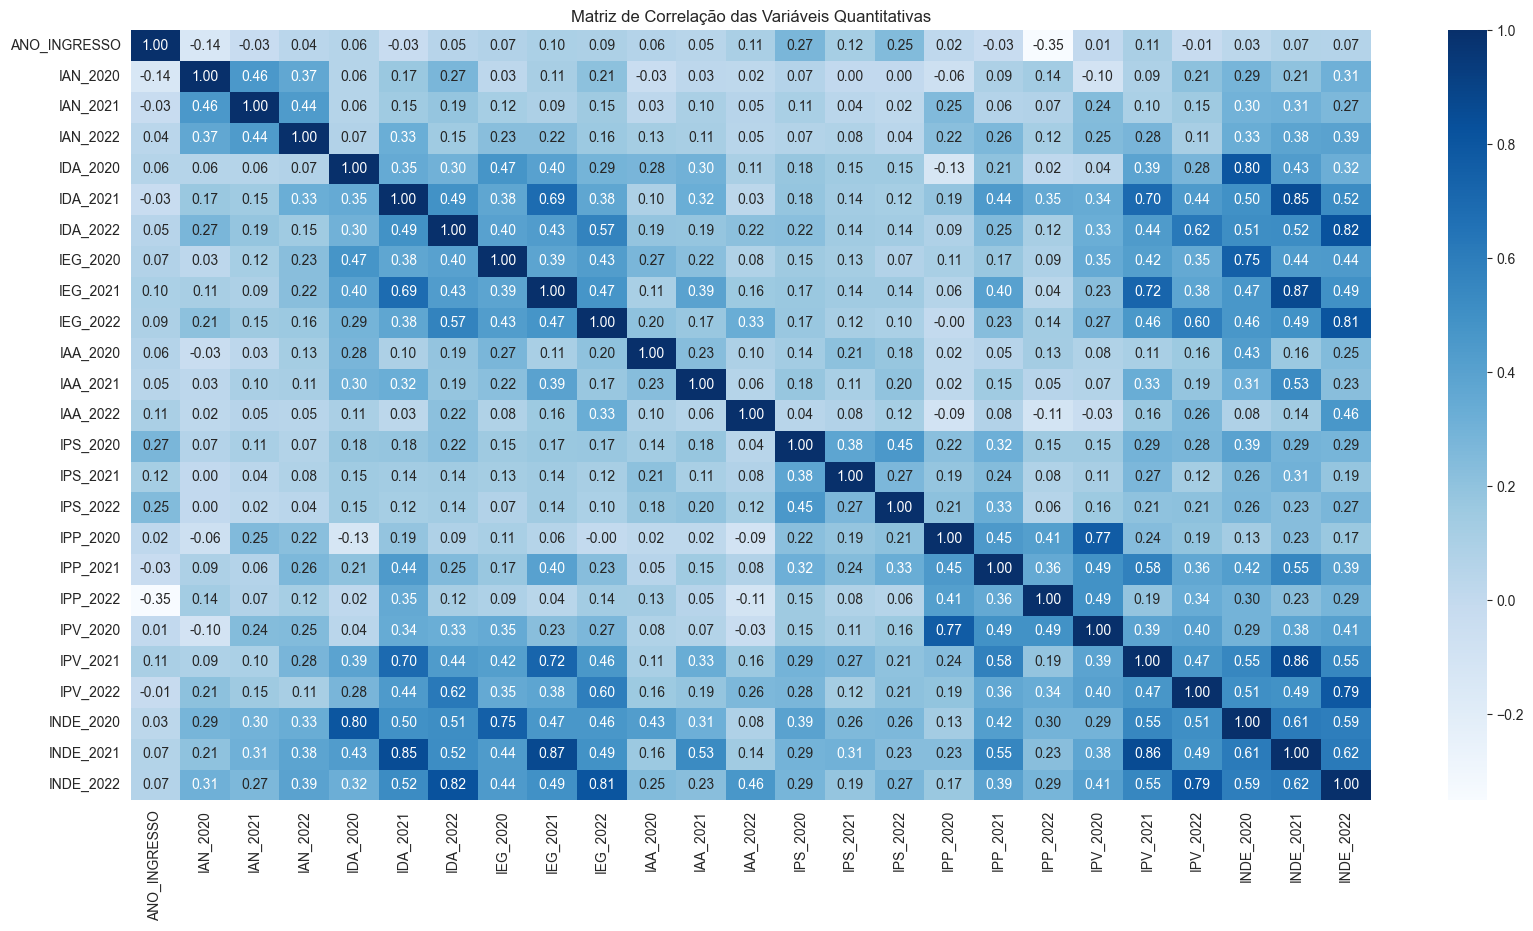

In [387]:
correlation_matrix = df_clean[quantitative_columns_total].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()

Maiores correlações positivas:
* IDA_2021 e IDA_2022: Correlação muito alta, acima de 0.85, sugerindo forte relação entre os anos consecutivos.
* INDE_2021 e INDE_2022: Correlação alta, acima de 0.86, indicando consistência ou padrão similar entre essas variáveis ao longo dos anos.
* IEG_2021 e IEG_2022: Correlação acima de 0.87, também indicando alta relação entre os anos consecutivos para essas variáveis.

Maiores correlações negativas:
* ANO_INGRESSO e IPP_2022: Correlação negativa forte em torno de -0.35, sugerindo uma relação inversa entre o ano de ingresso e o desempenho ou métrica associada ao IPP em 2022.

* **Análise Temporal**

*Tendências Anuais:*

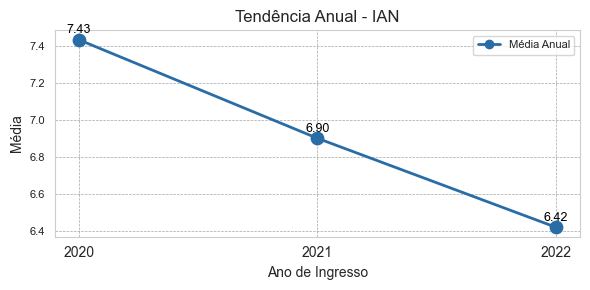

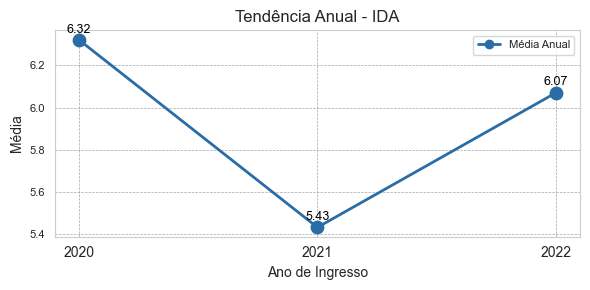

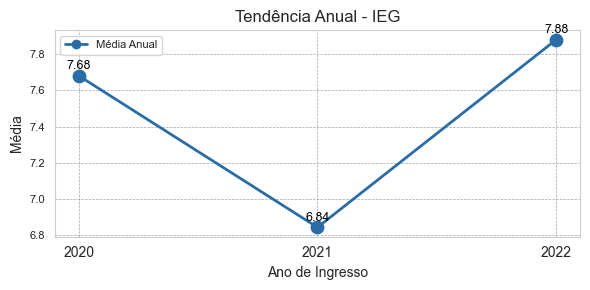

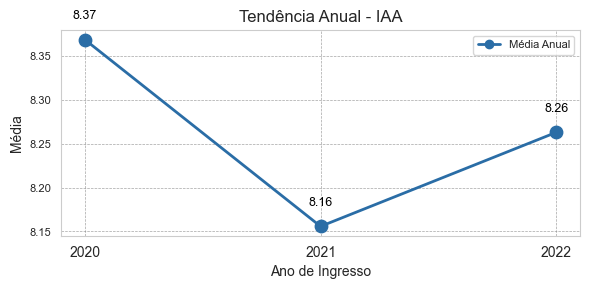

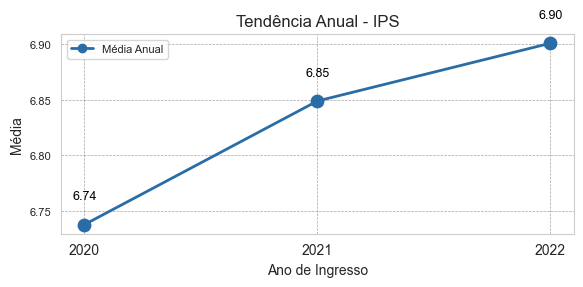

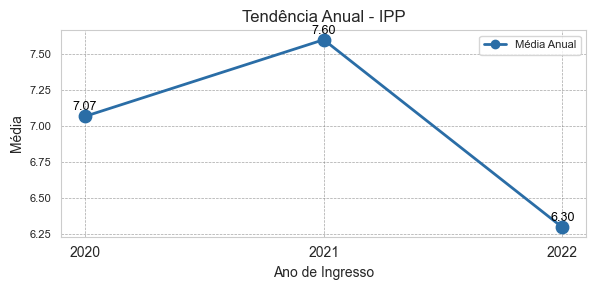

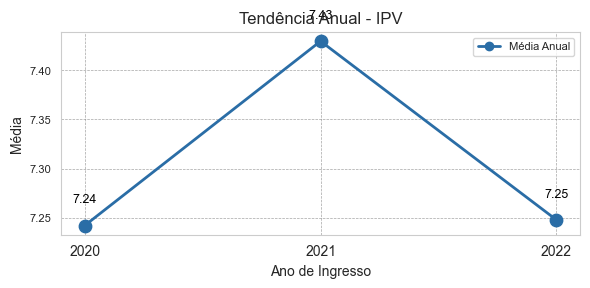

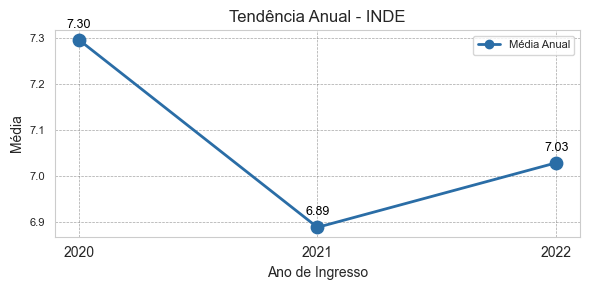

In [388]:
for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    plt.figure(figsize=(6, 3))  
    sns.set_style('whitegrid')  
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]]
    mean_values = df_clean[cols].mean()
    plt.plot(mean_values.index, mean_values.values, marker='o', color='#2A6DA6', linewidth=2, label='Média Anual')

    for year, value in zip(mean_values.index, mean_values.values):
        plt.scatter(year, value, color='#2A6DA6', s=80, zorder=5)
        plt.text(year, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='black')

    plt.title(f"Tendência Anual - {col_base}", fontsize=12)
    plt.xlabel('Ano de Ingresso', fontsize=10)
    plt.ylabel("Média", fontsize=10)

    plt.xticks(ticks=mean_values.index, labels=[c.split('_')[-1] for c in mean_values.index], fontsize=10)
    plt.yticks(fontsize=8)

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=8, loc='best')
    plt.tight_layout()
    plt.show()


1. IAN (Índice de Avaliação de Necessidades): O índice IAN mostra uma tendência de queda ao longo dos três anos analisados, com uma redução de 7,43 em 2020 para 6,42 em 2022. Isso sugere uma diminuição nas necessidades dos alunos ao longo do tempo, o que pode indicar uma melhoria nas condições ou nos apoios oferecidos, resultando em menos necessidades de intervenção.

2. IDA (Índice de Desempenho Acadêmico): O desempenho acadêmico diminui de 2020 (6,32) para 2021 (5,43), o que pode ser um reflexo de desafios enfrentados pelos alunos, como a pandemia de COVID-19. Em 2022, há uma leve recuperação para 6,07, o que pode indicar um processo de adaptação, onde os alunos começam a se recuperar do impacto das circunstâncias anteriores.

3. IEG (Índice de Engajamento Geral): O engajamento segue uma tendência interessante: cai de 7,80 em 2020 para 6,84 em 2021, possivelmente devido ao impacto da pandemia e mudanças no formato de ensino. No entanto, há uma recuperação em 2022 para 7,88, sugerindo que os alunos estão voltando a se engajar mais, possivelmente com a retomada das atividades presenciais ou com melhorias nos métodos de ensino.

4. IAA (Índice de Apoio Acadêmico): O apoio acadêmico se manteve bastante estável ao longo dos três anos, com pequenas variações entre 2020 (8,37), 2021 (8,16) e 2022 (8,26). Isso indica que o suporte oferecido aos alunos não foi drasticamente afetado pela pandemia e manteve-se eficaz ao longo do tempo, com uma leve queda apenas.

5. IPS (Índice de Progresso Social): O progresso social apresentou uma leve melhoria ao longo dos três anos, com a média aumentando de 6,74 em 2020 para 6,90 em 2022. Isso pode refletir esforços para apoiar o desenvolvimento social dos alunos, possivelmente devido a iniciativas para lidar com os efeitos da pandemia e melhorar as condições sociais.

6. IPP (Índice de Progresso Pessoal): O índice de progresso pessoal apresenta uma melhoria em 2021 (7,60), mas uma queda significativa em 2022 (6,30). Esse comportamento pode estar relacionado ao impacto prolongado da pandemia, que pode ter afetado o bem-estar emocional e pessoal dos alunos, resultando em dificuldades no desenvolvimento pessoal em 2022.

7. IPV (Índice de Progresso Vital): O progresso vital mostra uma leve tendência de melhora em 2021 (7,43), mas com uma queda sutil em 2022 (7,25). Isso pode indicar que os alunos, apesar dos desafios, conseguiram manter uma boa trajetória em termos de seu progresso vital, embora com uma leve diminuição após o pico de 2021.

8. INDE (Índice de Necessidade de Desenvolvimento Educacional): O índice INDE apresentou uma leve queda de 2020 para 2021, mas em 2022 houve uma leve recuperação para 7,03. Isso sugere que, apesar de uma ligeira diminuição na necessidade de desenvolvimento educacional em 2021, houve uma leve reversão dessa tendência em 2022, possivelmente devido a melhorias nas condições educacionais.

 
* **Visualização de Densidade:**

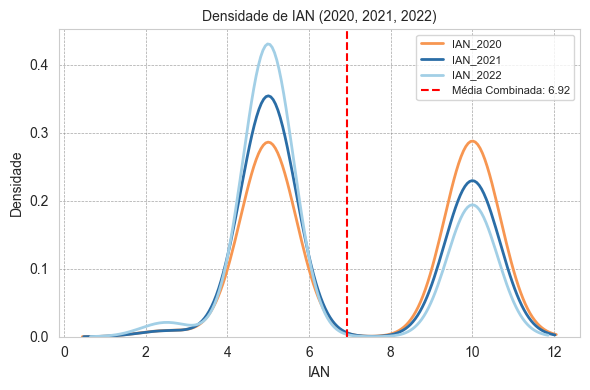

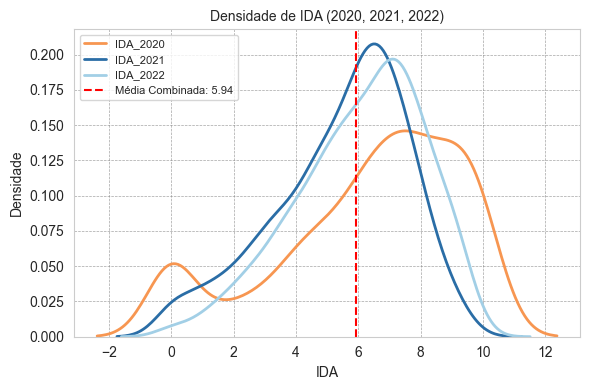

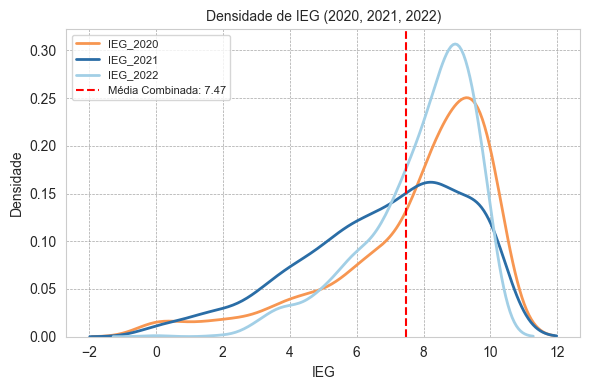

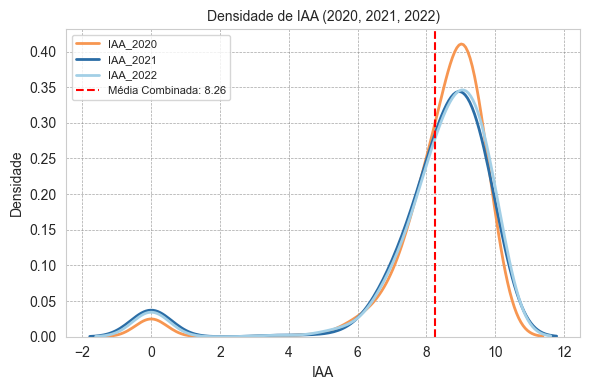

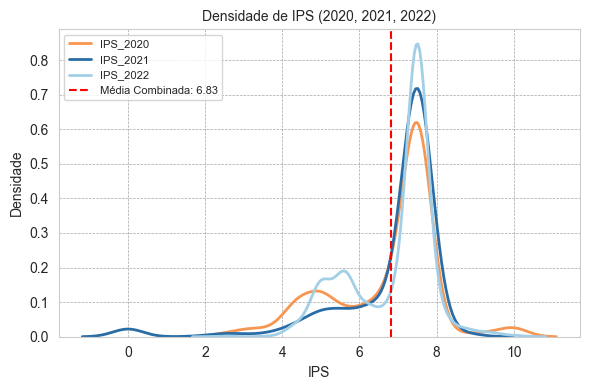

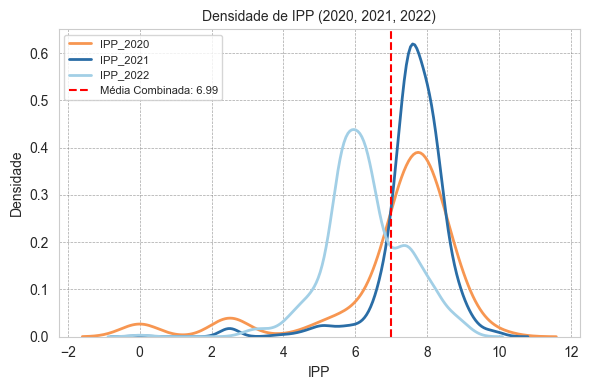

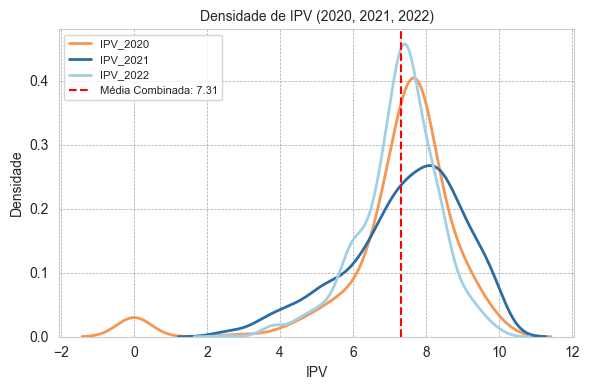

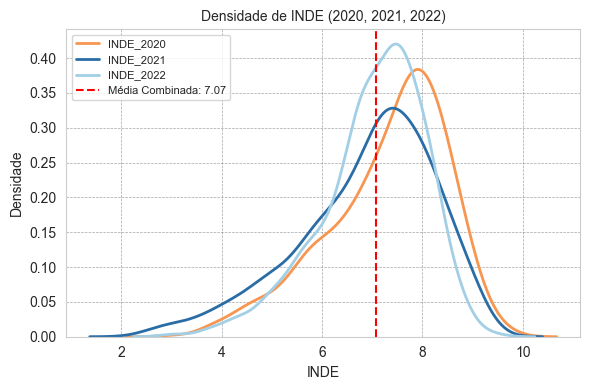

In [389]:

for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]] 
    
    plt.figure(figsize=(6, 4)) 
    sns.set_style('whitegrid')  
    
    mean_values = [] 

    for column, color in zip(cols, ['#F79651', '#2A6DA6', '#A2CFE6']): 
        if column in df_clean.columns:  
            sns.kdeplot(df_clean[column].dropna(), 
                        label=column, 
                        color=color, 
                        linewidth=2)
            mean_value = df_clean[column].mean()
            mean_values.append(mean_value)
    if mean_values: 
        combined_mean = sum(mean_values) / len(mean_values)
        plt.axvline(combined_mean, color='red', linestyle='--', linewidth=1.5, label=f'Média Combinada: {combined_mean:.2f}')

    plt.title(f'Densidade de {col_base} (2020, 2021, 2022)', fontsize=10)
    plt.xlabel(f'{col_base}', fontsize=10)
    plt.ylabel('Densidade', fontsize=10)
    plt.legend(fontsize=8)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

In [390]:
df_clean.columns

Index(['NOME', 'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020',
       'PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021',
       'PONTO_VIRADA_2022', 'IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020',
       'IDA_2021', 'IDA_2022', 'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020',
       'IAA_2021', 'IAA_2022', 'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020',
       'IPP_2021', 'IPP_2022', 'IPV_2020', 'IPV_2021', 'IPV_2022', 'INDE_2020',
       'INDE_2021', 'INDE_2022', 'STATUS_ALUNO', 'ANO_INGRESSO'],
      dtype='object')

1. IAN (Índice de Aprovação de Notas):
As curvas de densidade são simétricas nos três anos analisados. A maior densidade ocorre em 2022, enquanto a menor densidade é observada em 2020. Isso indica uma leve melhoria na distribuição dos índices de aprovação ao longo dos anos.

2. IDA (Índice de Desempenho Acadêmico): As curvas apresentam uma assimetria, inclinadas para o lado, sugerindo a presença de outliers. A maior densidade ocorre nos anos de 2021 e 2022, com a maior concentração de dados, enquanto o ano de 2020 apresenta uma distribuição mais dispersa.

3. IEG (Índice de Engajamento Geral): As curvas de densidade são simétricas nos anos de 2022 e 2020, enquanto em 2021, há uma assimetria inclinada para a esquerda. Os anos de 2022 e 2020 mostram uma maior concentração de dados próximos à média, enquanto 2021 apresenta uma dispersão maior, indicando variação no engajamento.

4. IAA (Índice de Atividade Acadêmica): As curvas de densidade de 2020, 2021 e 2022 quase se sobrepõem. Isso sugere que os valores das variáveis em cada um desses anos são semelhantes, sem grandes variações entre eles.

5. IPS (Índice de Participação Social): Para os valores abaixo da média combinada, as curvas são assimétricas, enquanto para os valores acima da média, as curvas se tornam simétricas. Essa diferença na distribuição pode indicar uma maior dispersão de dados em torno da média, mas uma tendência de normalidade para valores elevados.
6. IPP (Índice de Participação em Projetos): Em 2022, a curva está abaixo da média combinada, enquanto em 2021 e 2020 as curvas são simétricas, com variação na densidade. A dispersão dos dados parece ser maior em 2022, com uma menor concentração de índices perto da média.

7. IPV (Índice de Participação Voluntária): As curvas de densidade são simétricas nos anos de 2022 e 2020, com o pico na média combinada, enquanto em 2021, a curva é assimétrica, inclinada para o lado. O ano de 2021 apresenta uma maior dispersão, enquanto 2022 e 2020 têm maior concentração de dados próximos à média.

8. INDE (Índice de Desenvolvimento Educacional): As curvas de densidade são ligeiramente simétricas, com o pico próximo à média combinada.
Isso sugere que os dados estão relativamente equilibrados e próximos da média, sem grandes flutuações.

## Questões:
 

In [391]:
'''
Conectar as Variáveis Qualitativas e Quantitativas: Use variáveis como FASE_2020, FASE_2021, FASE_2022, e STATUS_ALUNO para criar 
trajetórias de progresso por aluno. Exemplo: 
"X% dos alunos que iniciaram na fase 0 em 2020 avançaram até a fase 3 em 2022".
'''

'\nConectar as Variáveis Qualitativas e Quantitativas: Use variáveis como FASE_2020, FASE_2021, FASE_2022, e STATUS_ALUNO para criar \ntrajetórias de progresso por aluno. Exemplo: \n"X% dos alunos que iniciaram na fase 0 em 2020 avançaram até a fase 3 em 2022".\n'

1. Qual fase ocorreu desistência tendo em base seu última fase cursada?

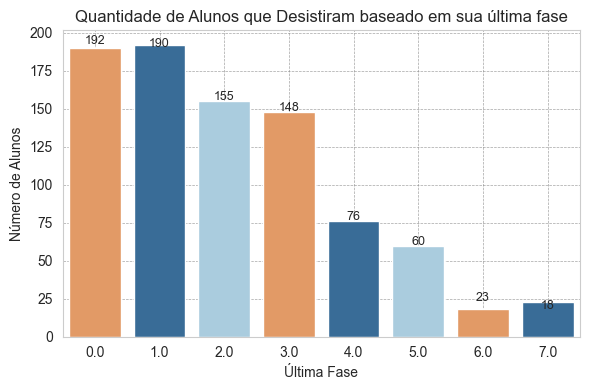

In [392]:
df_clean['FASE_PARADA'] = df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']].bfill(axis=1).iloc[:, -1]
custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6']
fase_counts = df_clean['FASE_PARADA'].value_counts()

plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.barplot(x=fase_counts.index, y=fase_counts.values, palette=custom_palette)
plt.title("Quantidade de Alunos que Desistiram baseado em sua última fase", fontsize=12)
plt.xlabel("Última Fase", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)

# Adiciona rótulos de valores nas barras
for index, value in enumerate(fase_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=9)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

*A análise dos dados indica que as desistências são mais comuns nas fases iniciais do curso, especialmente nas fases 0 e 1, onde a adaptação e o comprometimento podem ser maiores desafios para os alunos. À medida que os alunos progridem para as fases mais avançadas, a quantidade de desistências diminui, sugerindo que aqueles que alcançam essas fases tendem a ser mais resilientes e comprometidos.*

2a. Saber diante das notas gerais em qual classificação estão as desistencias.

In [393]:
df_clean['STATUS_ALUNO'].unique()

array(['Desistiu em 2022', 'Desistiu em 2021', 'Ativo', 'Desistencia',
       'Retornou em 2022'], dtype=object)

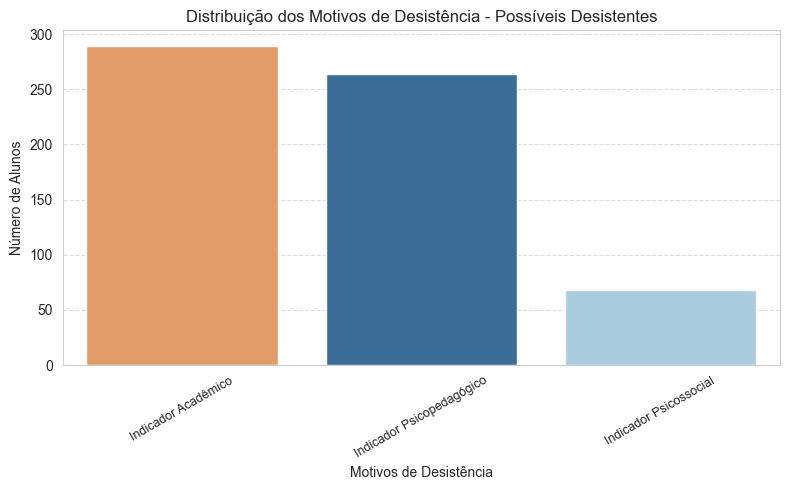

In [394]:
df_clean['dimensao_academica'] = df_clean[['IAN_2020', 'IDA_2020', 'IEG_2020',
                                           'IAN_2021', 'IDA_2021', 'IEG_2021',
                                           'IAN_2022', 'IDA_2022', 'IEG_2022']].mean(axis=1)

df_clean['dimensao_psicossocial'] = df_clean[['IAA_2020', 'IPS_2020',
                                              'IAA_2021', 'IPS_2021',
                                              'IAA_2022', 'IPS_2022']].mean(axis=1)

df_clean['dimensao_psicopedagogica'] = df_clean[['IPP_2020', 'IPV_2020',
                                                 'IPP_2021', 'IPV_2021',
                                                 'IPP_2022', 'IPV_2022']].mean(axis=1)

# Filtrando alunos com possível desistência
df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia']

# Identificando o menor indicador como motivo de desistência
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia[
    ['dimensao_academica', 'dimensao_psicossocial', 'dimensao_psicopedagogica']
].idxmin(axis=1)

# Tradução dos motivos
traducao_dimensoes = {
    'dimensao_academica': 'Indicador Acadêmico',
    'dimensao_psicossocial': 'Indicador Psicossocial',
    'dimensao_psicopedagogica': 'Indicador Psicopedagógico'
}
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].map(traducao_dimensoes)

# Contando os motivos de desistência
motivos_counts = df_desistencia['MOTIVO_DESISTENCIA'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribuição dos Motivos de Desistência - Possíveis Desistentes", fontsize=12)
plt.xlabel("Motivos de Desistência", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.xticks(rotation=30, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A análise dos motivos de desistência revela que a dimensão acadêmica é o principal fator relacionado às desistências, com uma quantidade considerável de alunos indicando dificuldades nesse aspecto. A dimensão psicossocial, embora ainda relevante, apresenta um impacto um pouco menor. Por fim, a dimensão psicopedagógica também se destaca, mas em uma proporção semelhante à acadêmica, indicando que as questões relacionadas ao aprendizado e ao apoio pedagógico têm um papel importante nas desistências.

Essa distribuição sugere que estratégias focadas no fortalecimento acadêmico e no suporte psicopedagógico poderiam ser eficazes para reduzir as desistências entre os alunos.

2b. Justificativa de desistência: Índices menores

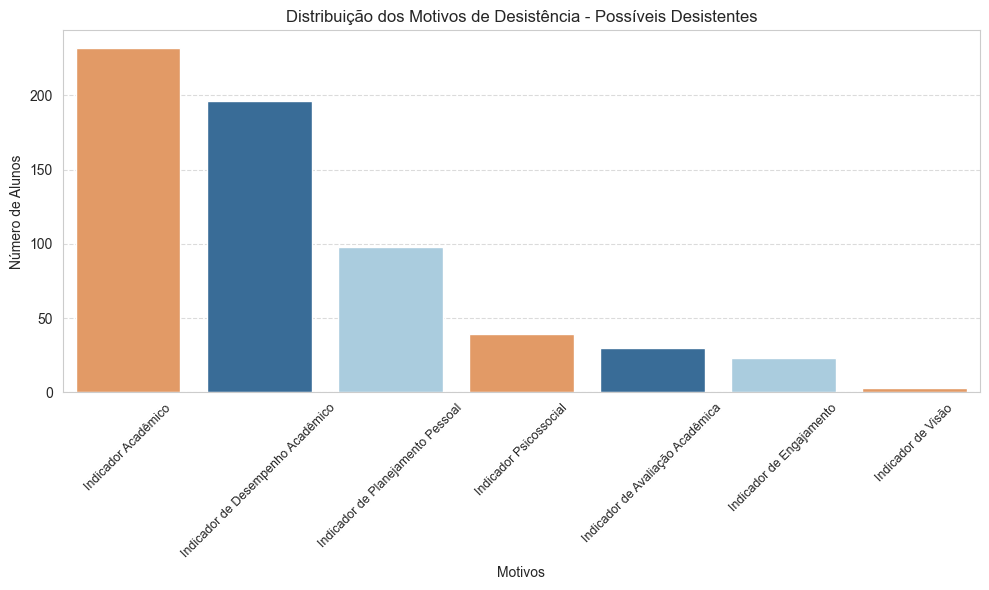

In [395]:
colunas_abordadas = [
    'IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022',
    'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020', 'IAA_2021', 'IAA_2022',
    'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020', 'IPP_2021', 'IPP_2022',
    'IPV_2020', 'IPV_2021', 'IPV_2022'
]

df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia'][colunas_abordadas]
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia.idxmin(axis=1)
traducao_motivos = {
    'IAN': 'Indicador Acadêmico',
    'IDA': 'Indicador de Desempenho Acadêmico',
    'IEG': 'Indicador de Engajamento',
    'IAA': 'Indicador de Avaliação Acadêmica',
    'IPS': 'Indicador Psicossocial',
    'IPP': 'Indicador de Planejamento Pessoal',
    'IPV': 'Indicador de Visão'
}

df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].str.extract(r'(\w+)_\d+')
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].map(traducao_motivos)

motivos_counts = df_desistencia['MOTIVO_DESISTENCIA'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribuição dos Motivos de Desistência - Possíveis Desistentes", fontsize=12)
plt.xlabel("Motivos", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




3. Tempo de Permanência para alunos com "Possível desistência

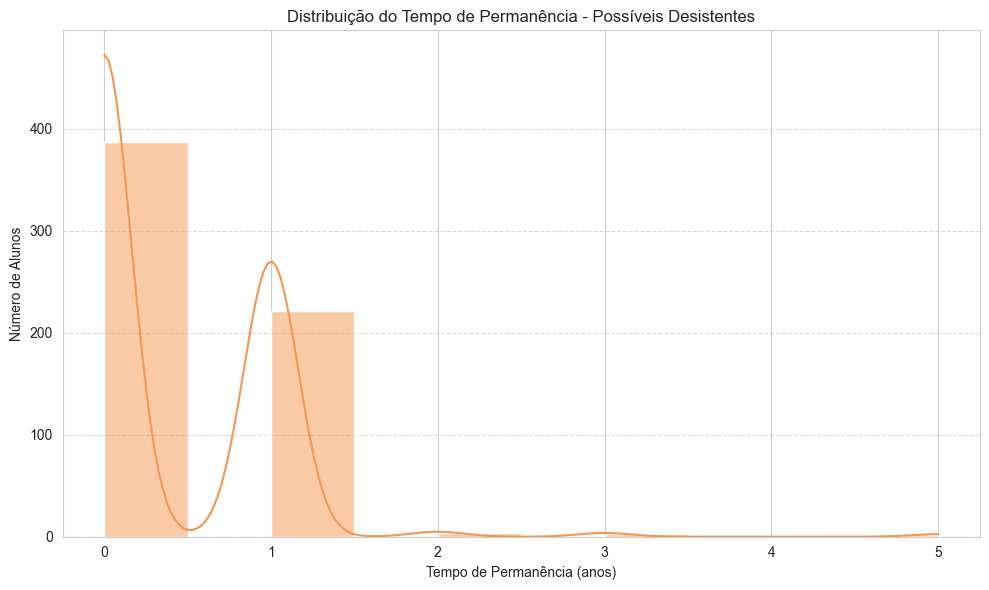

Média de tempo de permanência dos alunos classificados como 'Desistencia': 0.40 anos


In [396]:
df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia'].copy()

# Calcula o tempo de permanência com base no ano de ingresso
if 'ANO_INGRESSO' in df_desistencia.columns:
    # Usa 2022 como o último ano de referência
    df_desistencia['TEMPO_PERMANENCIA'] = 2022 - df_desistencia['ANO_INGRESSO']
else:
    raise KeyError("A coluna 'ANO_INGRESSO' não está presente no dataframe.")

# Gráfico de distribuição do tempo de permanência
plt.figure(figsize=(10, 6))
sns.histplot(df_desistencia['TEMPO_PERMANENCIA'], kde=True, color='#F79651', bins=10)
plt.title("Distribuição do Tempo de Permanência - Possíveis Desistentes", fontsize=12)
plt.xlabel("Tempo de Permanência (anos)", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcula e imprime a média do tempo de permanência
media_tempo = df_desistencia['TEMPO_PERMANENCIA'].mean()
print(f"Média de tempo de permanência dos alunos classificados como 'Desistencia': {media_tempo:.2f} anos")

A análise da distribuição do tempo de permanência entre os alunos que desistiram revela que a grande maioria deixou o curso nas primeiras fases, com destaque para as fases 0 e 1, que acumulam o maior número de desistências. As fases 2, 3, 4 e 5 têm um número significativamente menor de desistências, indicando que as desistências diminuem conforme o aluno avança nas fases. As fases 6 e 7 não aparecem, o que pode sugerir que os alunos que chegam a essas fases são mais resilientes ou encontram mais apoio.

Além disso, a média de tempo de permanência dos alunos que desistiram é de apenas 0.40 anos, o que reforça a ideia de que muitas desistências acontecem logo no início do curso, possivelmente devido a dificuldades acadêmicas, psicossociais ou psicopedagógicas. Isso indica a importância de um acompanhamento mais próximo nos primeiros anos, para identificar e mitigar os fatores que levam à desistência.

4. Tempo de permanência dos alunos na fase 7

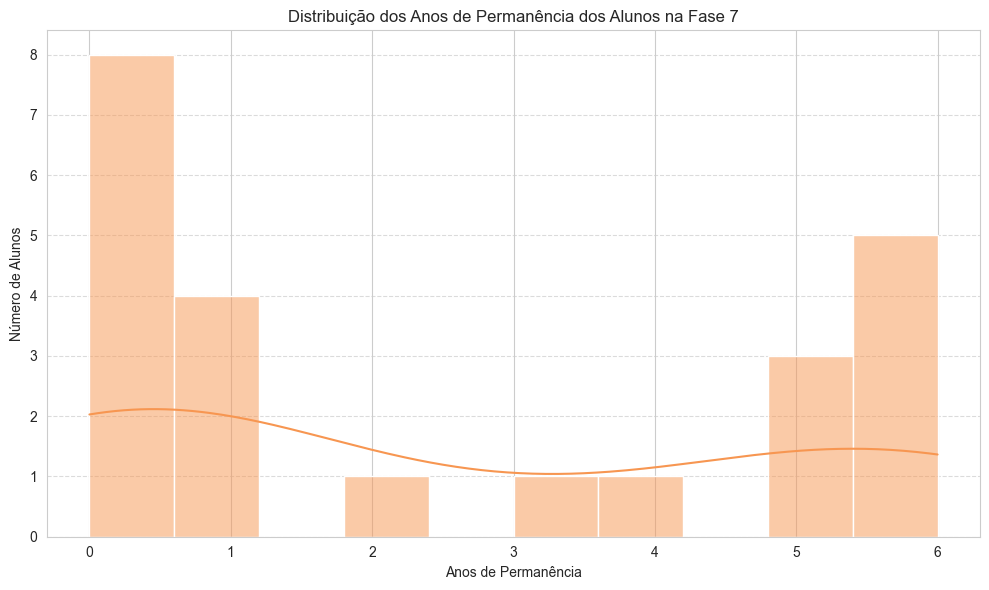

In [397]:
df_fase7 = df_clean[df_clean['FASE_PARADA'] == 7].copy()

# Calcula o ano de permanência e o tempo de permanência
if 'ANO_INGRESSO' in df_fase7.columns:
    df_fase7['PERMANENCIA_ANOS'] = 2022 - df_fase7['ANO_INGRESSO']
else:
    raise KeyError("A coluna 'ANO_INGRESSO' não está presente no dataframe.")


# Gráfico de distribuição dos anos de permanência
plt.figure(figsize=(10, 6))
sns.histplot(df_fase7['PERMANENCIA_ANOS'], kde=True, color='#F79651', bins=10)
plt.title("Distribuição dos Anos de Permanência dos Alunos na Fase 7", fontsize=12)
plt.xlabel("Anos de Permanência", fontsize=10)
plt.ylabel("Número de Alunos", fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A análise da distribuição dos anos de permanência dos alunos na fase 7 revela que a maioria dos alunos que chegaram a essa fase permaneceu por um período curto de tempo, com muitos ficando menos de 2 anos no curso. Alguns poucos estudantes ficaram por um período de 6 anos, indicando que, embora a fase 7 represente uma fase final, nem todos os alunos têm uma trajetória longa. Além disso, há um número considerável de alunos que desistiram logo após ingressar, com períodos de permanência muito curtos, como 0 anos, o que sugere que a desistência pode ocorrer logo após a chegada à fase 7.

O gráfico de distribuição, juntamente com os dados, sugere que a fase 7 pode ter um padrão misto: há alunos que permanecem por um tempo significativo, enquanto outros desistem rapidamente, o que pode indicar questões específicas de motivação, dificuldades acadêmicas ou outras razões externas que influenciam essa fase.

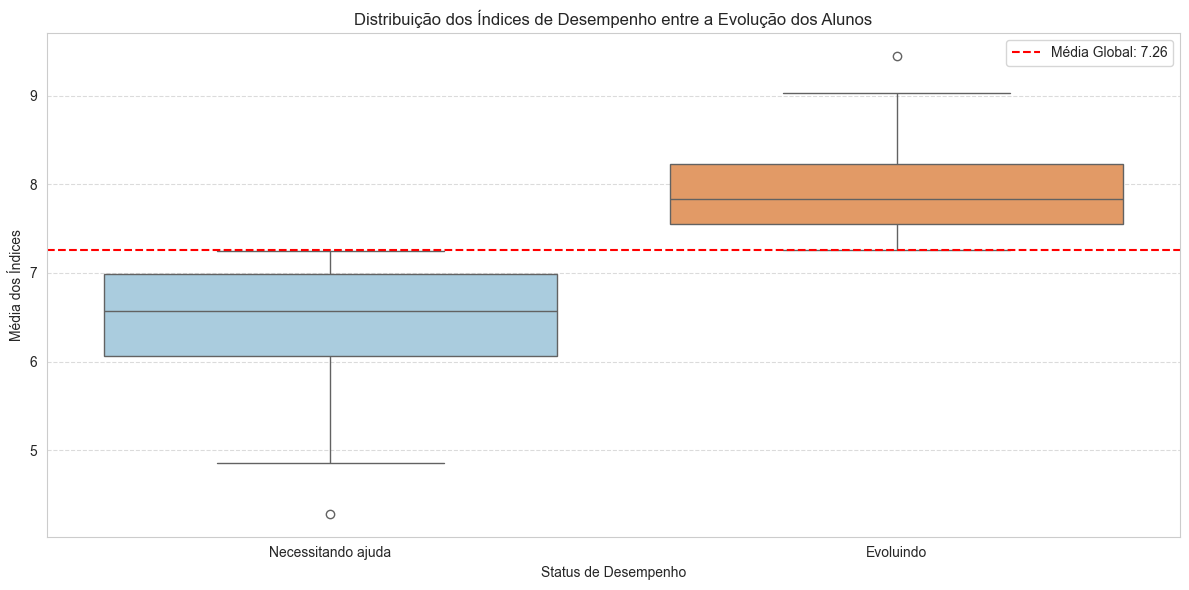

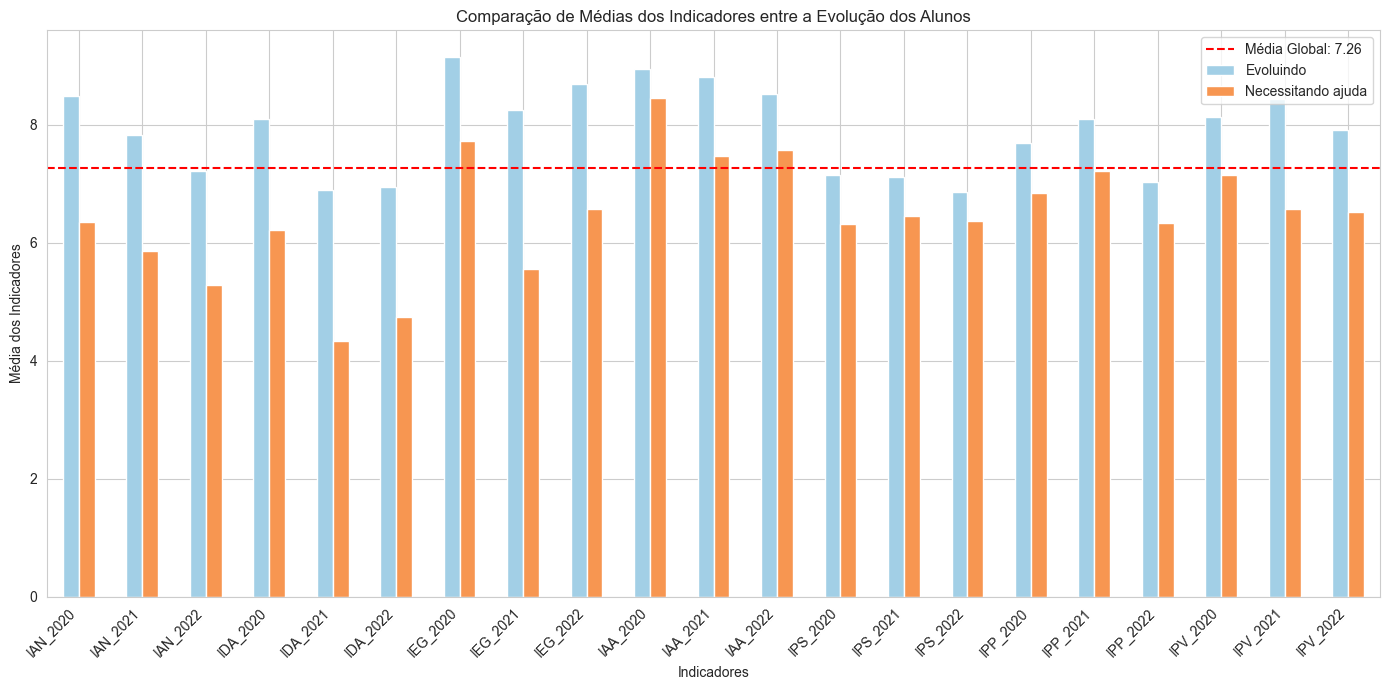

Média global dos índices: 7.26


In [398]:
df_ativos = df_clean[df_clean['STATUS_ALUNO'] == 'Ativo']
indices = ['IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022', 
           'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020', 'IAA_2021', 'IAA_2022',
           'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020', 'IPP_2021', 'IPP_2022', 
           'IPV_2020', 'IPV_2021', 'IPV_2022']

df_ativos['MEDIA_INDICES'] = df_ativos[indices].mean(axis=1)

media_global = df_ativos[indices].stack().mean()
limite_bem = media_global

df_ativos['STATUS_DESEMPENHO'] = ['Evoluindo' if x > limite_bem else 'Necessitando ajuda' for x in df_ativos['MEDIA_INDICES']]
df_comparacao = df_ativos.groupby('STATUS_DESEMPENHO')[indices].mean()

# comparações entre os grupos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ativos, x='STATUS_DESEMPENHO', y='MEDIA_INDICES', palette=['#A2CFE6', '#F79651'])
plt.title('Distribuição dos Índices de Desempenho entre a Evolução dos Alunos', fontsize=12)
plt.xlabel('Status de Desempenho', fontsize=10)
plt.ylabel('Média dos Índices', fontsize=10)
plt.axhline(y=media_global, color='red', linestyle='--', label=f'Média Global: {media_global:.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# omparações entre indicadores
df_comparacao.T.plot(kind='bar', figsize=(14, 7), color=['#A2CFE6', '#F79651'])
plt.title('Comparação de Médias dos Indicadores entre a Evolução dos Alunos', fontsize=12)
plt.ylabel('Média dos Indicadores', fontsize=10)
plt.xlabel('Indicadores', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=media_global, color='red', linestyle='--', label=f'Média Global: {media_global:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Média global dos índices: {media_global:.2f}")


A análise desses gráficos revela que os alunos classificados como "Indo Bem" apresentam um desempenho consistentemente superior em várias dimensões, enquanto os alunos "Não Indo Bem" apresentam um desempenho mais variado e, em muitos casos, inferior à média global.
Além disso, pode-se inferir que fatores acadêmicos, psicossociais e psicopedagógicos estão fortemente correlacionados ao desempenho geral dos alunos, com aqueles indo bem em uma área tendendo a ir bem nas outras também.

Intervenções focadas nos alunos "Não Indo Bem" podem se beneficiar de uma abordagem mais personalizada, considerando suas dificuldades específicas, seja no campo acadêmico ou psicossocial.

## Analise de todos os gráficos e estatísticas

### **Introdução**

Este documento apresenta as análises realizadas sobre o desempenho educacional dos alunos da ONG "Passos Mágicos" durante os anos de 2020, 2021 e 2022. O objetivo foi compreender os padrões de progresso, desistências, e os fatores que influenciam o aprendizado dos alunos. Os dados analisados incluem diversos indicadores, como desempenho acadêmico, engajamento, adequação ao nível e aspectos psicossociais.



### **Resultados da Análise**

*Frequência de Alunos por Fase*
* 2020: A maior concentração de alunos estava nas fases 1 a 3.
* 2021 e 2022: As fases 0 a 3 apresentaram distribuições equilibradas, mas houve uma queda expressiva no número de alunos a partir da fase 4. Em todos os anos, a quantidade de alunos reduzia pela metade a cada avanço de fase.

*Distribuição das Pedras (Classificação pelo INDE)*

As classificações são baseadas nos seguintes intervalos:
* Quartzo: 2,405 a 5,506
* Ágata: 5,506 a 6,868
* Ametista: 6,868 a 8,230
* Topázio: 8,230 a 9,294

* 2020: Houve um número considerável de alunos classificados como Quartzo e Ametista, indicando uma boa distribuição entre os extremos.

* 2021 e 2022: A maior parte dos alunos foi classificada como Ametista e Topázio, demonstrando um desempenho geral elevado.

*Indicador Ponto de Virada*

Embora muitos alunos apresentassem bom desempenho em suas respectivas fases, a maioria não atingiu o ponto de virada nos três anos analisados.


*Desistências: Impactos Temporais e Perfil Acadêmico*

* Análise Temporal:
    * O ano de 2021 apresentou o maior índice de desistências, um fenômeno amplamente associado aos impactos da pandemia de COVID-19.

* Perfil das Desistências:
    * A maioria das desistências ocorreu entre estudantes nas fases iniciais do curso (fases 0 a 3), evidenciando maior vulnerabilidade nesse estágio acadêmico. Por outro lado, os índices de desistências nas fases mais avançadas foram significativamente menores.

* Classificação dos Alunos:

    * Ativos (314): Estudantes que permaneceram matriculados durante os três anos analisados (2020, 2021 e 2022).
    * Retornaram em 2022 (13): Alunos que participaram em 2020, não estiveram presentes em 2021 (classificados como ausentes) e retornaram em 2022.

* Desistências:
    * Desistências em 2022: Foram registrados 141 casos de desistências.
    * Desistências em anos anteriores: Até 2021, acumulou-se um total de 880 desistências, sendo 259 casos apenas no ano de 2021.
* Destaques da Análise:
    * A análise evidencia o impacto temporal das desistências, destacando as fases iniciais como as mais críticas em termos de evasão acadêmica. Além disso, reforça o papel de eventos externos, como a pandemia, no comportamento e engajamento dos estudantes.


*Desempenho Geral (INDE)*

* A análise do INDE mostrou que a maioria dos alunos teve desempenho acima da média em todos os anos, com um aumento gradual de notas altas entre 2020 e 2022.

*Outliers nos Indicadores*

* IEG (Engajamento): Muitos alunos apresentaram notas abaixo da média, indicando desafios de engajamento.
* IAA (Autoavaliação): Poucos alunos se autoavaliaram negativamente, sugerindo confiança no próprio progresso.
* IPS (Psicossocial): O ano de 2021 teve os piores resultados, possivelmente devido às dificuldades impostas pela pandemia.
* IPP (Psicopedagógico): Notas baixas predominam em 2020 e 2021, mas houve melhora significativa em 2022.

*Correlação entre Indicadores*

* Os indicadores de avaliação apresentaram alta correlação com o INDE, reforçando a importância desses fatores para o desenvolvimento educacional.

*Tendência Anual*

* 2020: Maior média geral de notas.
* 2021: Desempenho mais baixo, refletindo as dificuldades da pandemia.
* 2022: Recuperação significativa, com aumento de novos ingressos e melhoria no desempenho geral.

### **Conclusão**

As análises revelaram padrões importantes no progresso e nos desafios enfrentados pelos alunos da ONG Passos Mágicos:

* A maioria dos alunos progride bem ao longo dos anos, mas as fases iniciais apresentam maior índice de desistência.
* A pandemia impactou negativamente o engajamento, o desempenho psicossocial e o psicopedagógico em 2021.
* Indicadores como IEG e INDE são cruciais para monitorar o desenvolvimento acadêmico.

### **Especulação de Melhorias para a ONG**

* Redução de Desistências nas Fases Iniciais: Implementar programas de incentivo personalizados para alunos das fases 0 a 3, como mentoria individualizada, apoio financeiro e acompanhamento familiar.

* Engajamento Acadêmico: Desenvolver atividades interativas e adaptadas à realidade dos alunos para melhorar o engajamento, especialmente para aqueles com baixos índices de IEG.

* Apoio Psicossocial: Aumentar o suporte psicológico para minimizar os efeitos de crises externas, como a pandemia, oferecendo sessões de acompanhamento mais frequentes.

* Monitoramento Contínuo: Implementar um sistema de monitoramento que avalie regularmente o progresso dos alunos e identifique precocemente os riscos de desistência.

* Integração Familiar: Envolver as famílias no processo educacional, promovendo workshops e reuniões para conscientizar sobre a importância da continuidade acadêmica.

 A análise dos dados entre 2020 e 2022 mostra um quadro de desafios para os alunos, com quedas no desempenho acadêmico e no engajamento, seguidas por sinais de recuperação em 2022. As instituições de ensino demonstraram resiliência na manutenção do apoio acadêmico, mas precisam focar em estratégias mais personalizadas para os alunos que enfrentam dificuldades, especialmente nas fases iniciais, onde as taxas de desistência são mais altas. O aprimoramento do apoio psicológico, psicopedagógico e social pode ser crucial para melhorar o desempenho geral dos alunos e reduzir as desistências ao longo do curso. Com essas estratégias, espera-se que a ONG Passos Mágicos possa aumentar a retenção dos alunos e promover um impacto ainda maior na formação educacional e social dos beneficiários.


In [399]:
#df_clean_completo.to_csv(r'df_clean_completo.csv', index=False)

In [400]:
#df_clean.to_csv(r'dados\df_clean.csv', index=False)

## Tratamento dos dados

In [401]:
'''
Predição de desempenho futuro e análise de outliers (O que fez alguns alunos serem um dos melhores que já passou na Passos?)
Predição para recomendação de bolsas, intercambio, etc
Análise comparatória de 2020, 2021 e 2022
Análise de alunos (de forma individual? 🤔) ao longo dos anos (Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?)
Análise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.
Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada
'''

"\nPredição de desempenho futuro e análise de outliers (O que fez alguns alunos serem um dos melhores que já passou na Passos?)\nPredição para recomendação de bolsas, intercambio, etc\nAnálise comparatória de 2020, 2021 e 2022\nAnálise de alunos (de forma individual? 🤔) ao longo dos anos (Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?)\nAnálise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.\nTentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada\n"

### *Dividindo os dados em conjunto de treino e teste.*

In [402]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
SEED = 1561651

In [403]:
df_tratamento = df_clean

In [404]:
df_tratamento  = df_tratamento[['NOME', 'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020',
       'PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021',
       'PONTO_VIRADA_2022','STATUS_ALUNO', 'ANO_INGRESSO', 'dimensao_academica', 'dimensao_psicossocial',
       'dimensao_psicopedagogica']]

In [405]:
df_tratamento.isnull().sum()

NOME                          0
FASE_2020                   621
FASE_2021                   664
FASE_2022                   486
PEDRA_2020                  621
PEDRA_2021                  664
PEDRA_2022                  486
PONTO_VIRADA_2020           621
PONTO_VIRADA_2021           664
PONTO_VIRADA_2022           486
STATUS_ALUNO                  0
ANO_INGRESSO                  4
dimensao_academica            0
dimensao_psicossocial         0
dimensao_psicopedagogica      0
dtype: int64

In [406]:
df_tratamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   NOME                      1348 non-null   object  
 1   FASE_2020                 727 non-null    float64 
 2   FASE_2021                 684 non-null    float64 
 3   FASE_2022                 862 non-null    float64 
 4   PEDRA_2020                727 non-null    category
 5   PEDRA_2021                684 non-null    category
 6   PEDRA_2022                862 non-null    category
 7   PONTO_VIRADA_2020         727 non-null    float64 
 8   PONTO_VIRADA_2021         684 non-null    float64 
 9   PONTO_VIRADA_2022         862 non-null    float64 
 10  STATUS_ALUNO              1348 non-null   object  
 11  ANO_INGRESSO              1344 non-null   float64 
 12  dimensao_academica        1348 non-null   float64 
 13  dimensao_psicossocial     1348 non-null   float6

In [407]:
df_tratamento[['FASE_2020', 'FASE_2021', 'FASE_2022']] = df_tratamento[['FASE_2020', 'FASE_2021', 'FASE_2022']].apply(lambda x: x.ffill().bfill(), axis=1)


In [408]:
df_tratamento[['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022']] = df_tratamento[['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022']].apply(lambda x: x.ffill().bfill(), axis=1)


In [409]:
df_tratamento[['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']] = df_tratamento[['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']].apply(lambda x: x.ffill().bfill(), axis=1)


In [410]:
df_tratamento.columns

Index(['NOME', 'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020',
       'PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021',
       'PONTO_VIRADA_2022', 'STATUS_ALUNO', 'ANO_INGRESSO',
       'dimensao_academica', 'dimensao_psicossocial',
       'dimensao_psicopedagogica'],
      dtype='object')

In [411]:
def categorize_status(df):
    df['ATIVO'] = df['STATUS_ALUNO'].apply(
        lambda x: 0 if x in ['Desistiu em 2021', 'Desistencia', 'Desistiu em 2022'] else 1)
    df = df.drop(columns=['STATUS_ALUNO'])
    return df
df_tratamento = categorize_status(df_tratamento)

In [412]:
variaveis_categoricas = df_tratamento[['dimensao_academica', 'dimensao_psicossocial', 'dimensao_psicopedagogica']]

def classificar_dimensoes(row):
    resultado = []
    for coluna in variaveis_categoricas.columns:
        if row[coluna] <= 6:
            resultado.append('abaixo da media')
        elif row[coluna] > 6:
            resultado.append('excelente')
    return resultado

# Aplicando a função e atribuindo os resultados
df_tratamento[['dimensao_academica', 'dimensao_psicossocial', 'dimensao_psicopedagogica']] = df_tratamento.apply(classificar_dimensoes, axis=1, result_type="expand")

In [413]:
df_tratamento = df_tratamento.dropna()

In [414]:
#df_tratamento.to_csv('df_tratamento.csv', index=False)

In [415]:
df_tratamento['ATIVO'].value_counts(normalize=True) * 100

ATIVO
0    75.669643
1    24.330357
Name: proportion, dtype: float64

In [416]:
df_treino, df_teste = train_test_split(df_tratamento, test_size=0.2, random_state=SEED)

In [417]:
df_teste.shape, df_treino.shape

((269, 15), (1075, 15))

* Normalização e Padronização

In [419]:
from sklearn.base import BaseEstimator, TransformerMixin
# BaseEstimator: Fornece metodos que são necessários para fazer algumas transformações que o modelo vai precisar.
# TransformerMixin: Permite que os dados sejam ajustados e transformados dentro das classes, define as classes da Pipeline

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
#MinMaxScaler: ele consegue normalizar os dados entre 0 e 1, para as variaveis numericas do df.
#OneHotEncoder: para os dados Strings, esse modelo vai atribuir valore de 0 a 1 para cada coluna que contem string. Ou seja, vai criar outras colunas, onde a coluna vai ter o nome de uma variavel, por exemplo: Estado_Civil  vai deixar de existir e tera a coluna Casado, Solteiro etc, onde para cada linha que contem a confirmacao de casado tera o dados 1 e para as putras linhas sera 0. E assim por diante. 
#OrdinalEncoder: neste caso vai ser parecido com o de cima, mas ka variavel contem uma ordem de "valores", como é o caso do grau_escolaridade, onde ensino fundamental tem um peso e o restante contem outro peso


from imblearn.over_sampling import SMOTE
# SMOTE: método para balanciar os dados, que neste caso é a coluna 'ATIVO', que contem os dados 0 e 1, onde 0 é desistente e 1 é ativo. O SMOTE vai criar dados sinteticos para a coluna 0, para que fique balanceado com a coluna 1.

In [420]:
class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, feature_to_drop=['NOME']):             
        self.feature_to_drop = feature_to_drop
        
    def fit(self, df):                                              
        return self                                                 
                                                                    
    
    def transform(self, df):                                    
        if (set(self.feature_to_drop).issubset(df.columns)):        
            df.drop(self.feature_to_drop, axis=1, inplace= True)       
                                                                    #
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df    

In [421]:
class MinMax(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler  = ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021','PONTO_VIRADA_2022' ]):
        self.min_max_scaler = min_max_scaler 
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler ).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler ])
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [422]:
class OneHotEncodingNames(BaseEstimator,TransformerMixin):
    def __init__(self,OneHotEncoding = ['dimensao_psicopedagogica', 'dimensao_academica', 'dimensao_psicossocial', 'PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022']):                                      
                                                                           
        self.OneHotEncoding = OneHotEncoding

    def fit(self,df):
        return self

    def transform(self,df):
        if (set(self.OneHotEncoding).issubset(df.columns)):
            # função para one-hot-encoding das features
            def one_hot_enc(df,OneHotEncoding):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[OneHotEncoding])
                # obtendo o resultado dos nomes das colunas
                feature_names = one_hot_enc.get_feature_names_out(OneHotEncoding)
                # mudando o array do one hot encoding para um dataframe com os nomes das colunas
                df = pd.DataFrame(one_hot_enc.transform(df[self.OneHotEncoding]).toarray(),
                                  columns= feature_names,index=df.index)
                return df

            # função para concatenar as features com aquelas que não passaram pelo one-hot-encoding
            def concat_with_rest(df,one_hot_enc_df,OneHotEncoding):              
                # get the rest of the features
                outras_features = [feature for feature in df.columns if feature not in OneHotEncoding]
                # concaternar o restante das features com as features que passaram pelo one-hot-encoding
                df_concat = pd.concat([one_hot_enc_df, df[outras_features]],axis=1)
                return df_concat

            # one hot encoded dataframe
            df_OneHotEncoding = one_hot_enc(df,self.OneHotEncoding)

            # retorna o dataframe concatenado
            df_full = concat_with_rest(df, df_OneHotEncoding,self.OneHotEncoding)
            return df_full

        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [423]:

class OrdinalFeature(BaseEstimator,TransformerMixin):
    def __init__(self,ordinal_feature = ['FASE_2020', 'FASE_2021', 'FASE_2022']):
        self.ordinal_feature = ordinal_feature
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.ordinal_feature ).issubset(df.columns)):
            ordinal_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ordinal_encoder.fit_transform(df[self.ordinal_feature])
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [424]:
class Oversample(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, df, y=None):
        # Não faz nada no fit, mas é necessário para usar no pipeline
        return self
    
    def transform(self, df):
        if 'ATIVO' in df.columns:
            # Aplica SMOTE usando 'ATIVO' como target
            oversample = SMOTE(sampling_strategy='minority')
            
            # Separa X e y
            X = df.loc[:, df.columns != 'ATIVO']
            y = df['ATIVO']
            
            # Aplica o SMOTE para balanceamento
            X_bal, y_bal = oversample.fit_resample(X, y)
            
            # Combina as variáveis X e y balanceadas em um único DataFrame
            df_bal = pd.DataFrame(X_bal, columns=X.columns)  # Usando as colunas originais de X
            df_bal['ATIVO'] = y_bal  # Adiciona a coluna de ATIVO
            
            return df_bal
        else:
            print("O target 'ATIVO' não está no DataFrame")
            return df

In [425]:
def novo_pipeline(df):
    # Definir o pipeline com os transformadores
    pipeline = Pipeline([
        ('feature_dropper', DropFeatures()),             # Remove features desnecessárias
        ('OneHotEncoding', OneHotEncodingNames()),       # Codificação OneHot para variáveis categóricas
        ('ordinal_feature', OrdinalFeature()),           # Codificação ordinal para variáveis ordinais
        ('min_max_scaler', MinMax()),                    # Normalização dos dados
        ('oversample', Oversample())                     # Superamostragem para balancear as classes
    ])
    
    try:
        # Aplicar o pipeline de transformação e retornar o resultado
        df_pipeline = pipeline.fit_transform(df)
        return df_pipeline
    except Exception as e:
        print(f"Erro ao aplicar o pipeline: {e}")
        return None

In [426]:
train = novo_pipeline(df_treino) 

In [427]:
test = novo_pipeline(df_teste)

In [428]:
X_train = train.drop(columns=['ATIVO'])
y_train = train['ATIVO']

In [429]:
X_test = train.drop(columns=['ATIVO'])
y_test = train['ATIVO']

In [430]:
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from scipy import stats
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [431]:
def roda_modelo(modelo):
    # Treinando modelo com os dados de treino
    modelo.fit(X_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc_score = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc_score}")

    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(X_test)[:, 0])
    data_mau = np.sort(modelo.predict_proba(X_test)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)

    print(f"Métrica KS: {kstest}")

    print("\nConfusion Matrix\n")
    print("\nConfusion Matrix\n")
    
    # Criando matriz de confusão com seaborn.heatmap, agora com porcentagens
    cm = confusion_matrix(y_test, modelo.predict(X_test))
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the values by row
    cm_percentage = np.round(cm_percentage * 100, 2)  # Convert to percentages

    plt.figure(figsize=(7, 7))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Ativo na ONG', 'Desistencia'], yticklabels=['Ativo na ONG', 'Desistencia'])
    plt.title("Matriz de Confusão (Porcentagens)", fontsize=16, fontweight="bold")
    plt.xlabel("Label predita", fontsize=18)
    plt.ylabel("Label verdadeira", fontsize=18)
    plt.show()

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

    print("\nRoc Curve\n")
    # Construindo manualmente a curva ROC
    fpr, tpr, _ = roc_curve(y_test, prob_predic[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title("Curva ROC", fontsize=16, fontweight="bold")
    plt.xlabel("Taxa de falsos positivos", fontsize=14)
    plt.ylabel("Taxa de verdadeiros positivos", fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

In [432]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(random_state=SEED)


------------------------------Resultados LogisticRegression(random_state=1561651)------------------------------

AUC 0.902279314732774
Métrica KS: KstestResult(statistic=np.float64(0.1262135922330097), pvalue=np.float64(7.460488933677304e-12), statistic_location=np.float64(0.8900038956370027), statistic_sign=np.int8(1))

Confusion Matrix


Confusion Matrix



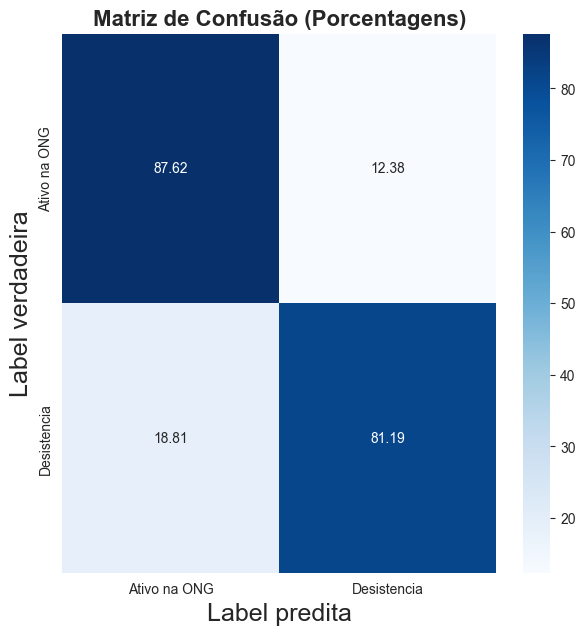


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       824
           1       0.87      0.81      0.84       824

    accuracy                           0.84      1648
   macro avg       0.85      0.84      0.84      1648
weighted avg       0.85      0.84      0.84      1648


Roc Curve



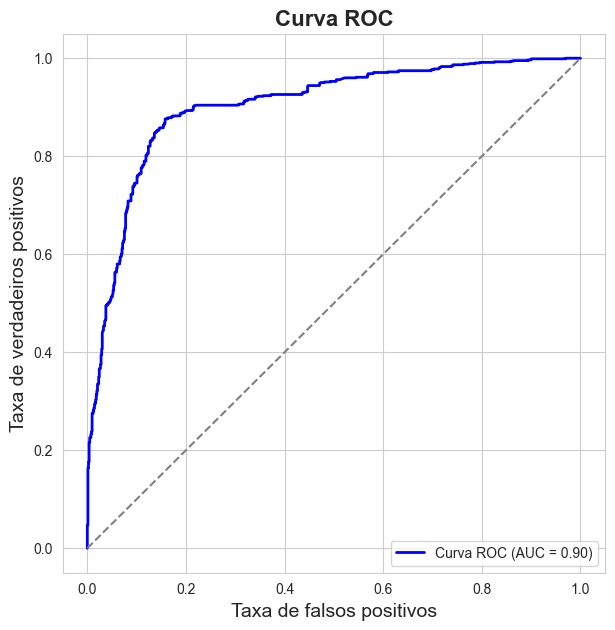

In [433]:
roda_modelo(modelo_logistico)

In [434]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier()


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC 0.9997128028089357
Métrica KS: KstestResult(statistic=np.float64(0.007281553398058253), pvalue=np.float64(0.9999999999939724), statistic_location=np.float64(0.5), statistic_sign=np.int8(-1))

Confusion Matrix


Confusion Matrix



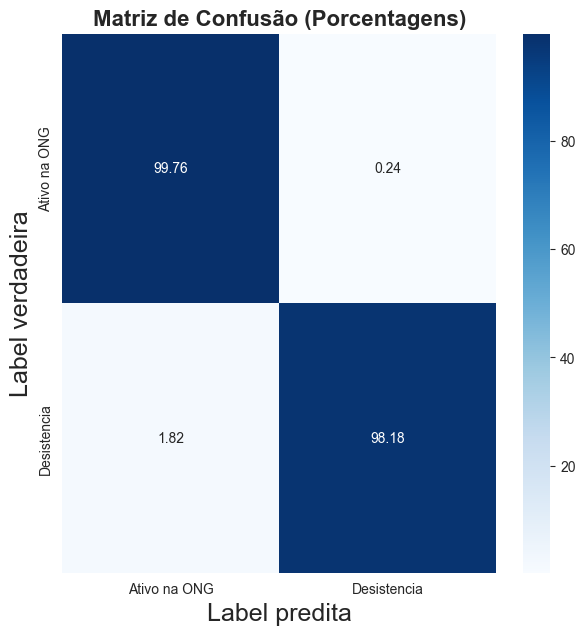


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       824
           1       1.00      0.98      0.99       824

    accuracy                           0.99      1648
   macro avg       0.99      0.99      0.99      1648
weighted avg       0.99      0.99      0.99      1648


Roc Curve



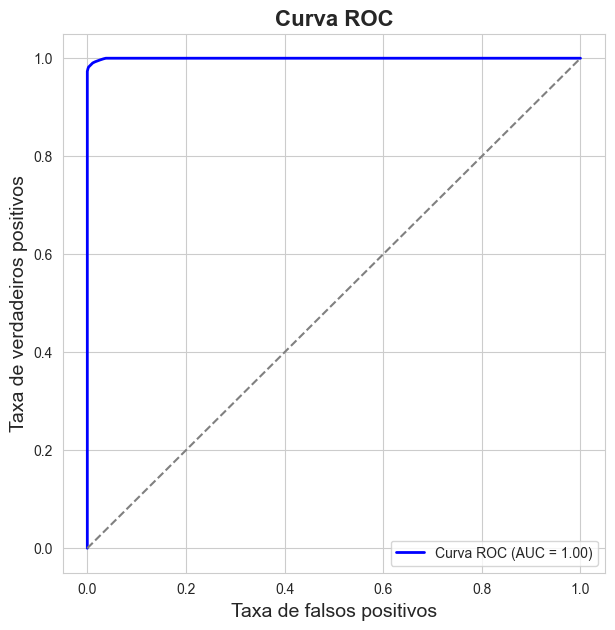

In [435]:
roda_modelo(modelo_tree)

In [436]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier() 


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC 0.9931374599396738
Métrica KS: KstestResult(statistic=np.float64(0.25910194174757284), pvalue=np.float64(5.184265924488781e-49), statistic_location=np.float64(0.011176103211933236), statistic_sign=np.int8(-1))

Confusion Matrix


Confusion Matrix



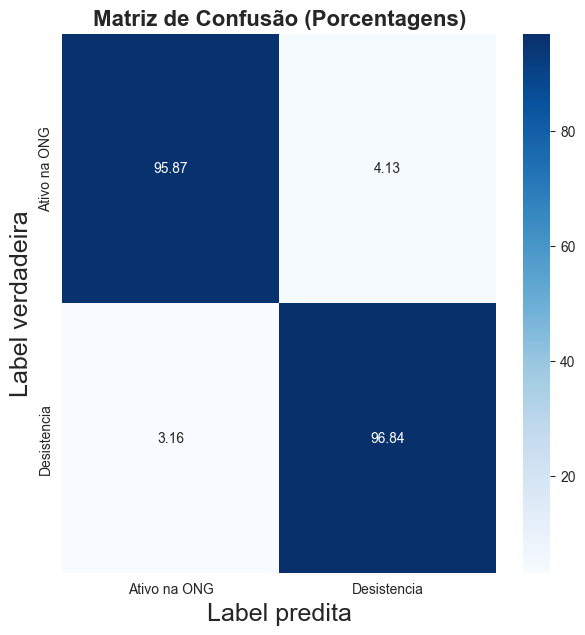


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       824
           1       0.96      0.97      0.96       824

    accuracy                           0.96      1648
   macro avg       0.96      0.96      0.96      1648
weighted avg       0.96      0.96      0.96      1648


Roc Curve



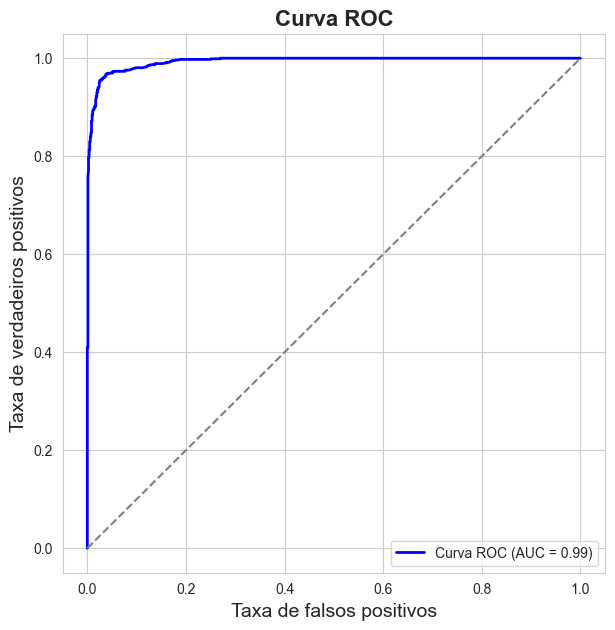

In [437]:
roda_modelo(modelo_xgb)

In [438]:
# salvando o modelo
import joblib

joblib.dump(modelo_xgb, r'Model_XGB.joblib')

['Model_XGB.joblib']

In [489]:
# Creating a sample dataframe
data = {
    'NOME': ['Aluno 1', 'Aluno 2', 'Aluno 3', 'Aluno 4', 'Aluno 5'],
    'FASE_2020': [1, 2, 3, 4, 5],
    'FASE_2021': [2, 3, 4, 5, 6],
    'FASE_2022': [3, 4, 5, 6, 7],
    'PEDRA_2020': ['Ametista', 'Quartzo', 'Ágata', 'Topázio', 'Ametista'],
    'PEDRA_2021': ['Quartzo', 'Ágata', 'Topázio', 'Ametista', 'Quartzo'],
    'PEDRA_2022': ['Ágata', 'Topázio', 'Ametista', 'Quartzo', 'Ágata'],
    'PONTO_VIRADA_2020': [0, 1, 0, 1, 0],
    'PONTO_VIRADA_2021': [1, 0, 1, 0, 1],
    'PONTO_VIRADA_2022': [0, 1, 0, 1, 0],
    'ANO_INGRESSO': [2018, 2019, 2020, 2021, 2022],
    'dimensao_academica': ['excelente', 'abaixo da media', 'excelente', 'abaixo da media', 'excelente'],
    'dimensao_psicossocial': ['excelente', 'excelente', 'abaixo da media', 'excelente', 'abaixo da media'],
    'dimensao_psicopedagogica': ['excelente', 'abaixo da media', 'excelente', 'excelente', 'abaixo da media']#,
    # 'ATIVO': [1, 0, 1, 0, 1]
}

df_test_model_xgb = pd.DataFrame(data)

In [491]:
df_test_model_xgb = novo_pipeline(df_test_model_xgb)

O target 'ATIVO' não está no DataFrame


In [494]:
df_test_model_xgb

,dimensao_psicopedagogica_abaixo da media,dimensao_psicopedagogica_excelente,dimensao_academica_abaixo da media,dimensao_academica_excelente,dimensao_psicossocial_abaixo da media,dimensao_psicossocial_excelente,PEDRA_2020_Ametista,PEDRA_2020_Quartzo,PEDRA_2020_Topázio,PEDRA_2020_Ágata,...,PEDRA_2022_Quartzo,PEDRA_2022_Topázio,PEDRA_2022_Ágata,FASE_2020,FASE_2021,FASE_2022,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,ANO_INGRESSO
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2018
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2019
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,2020
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3.0,3.0,3.0,1.0,0.0,1.0,2021
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,4.0,4.0,0.0,1.0,0.0,2022


In [493]:
# testando o modelo salvo
model_xgb = joblib.load(r'Model_XGB.joblib')
predictions = model_xgb.predict(df_test_model_xgb)
print(predictions)

[1 1 1 0 0]
